<span style="color: blue; font-size: 20px; font-weight: bold;">Комментарий ревьюера</span>

<span style="color: blue">Привет, Михаил! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</span>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u>⤵</summary>
<span style="color: blue">Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</span>


---


<span style="color: blue">синий текст - просто текст комментария</span>

<span style="color: green">✔️ и зеленый текст - все отлично</span>

<span style="color: orange">⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</span>

<span style="color: red">❌ и красный текст - есть недочеты</span>


</details>    
</br>
<span style="color: blue">Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное.</span>

<span style="color: blue">Ответы на мои комментарии лучше тоже помечать.<br>
Например: </span><br><span style="color: purple; font-weight: bold">Комментарий студента</span>

<span style="color: blue; font-weight: bold;">Давай смотреть, что получилось!</span>

<span style="color: blue; font-size: 18px; font-weight: bold;">Комментарий ревьюера 2</span>

<span style="color: blue">Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</span> 

# Проект: Обучение с учителем: качество модели

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.<br>
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и нам предстоит побыть в роли стажёра в этом отделе. <br>
Итак, нашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

##### Цели проекта<br>
Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

Нужно собрать данные по клиентам по следующим группам:
<ul>
    <li>Признаки, которые описывают коммуникацию сотрудников компании с клиентом.</li>
    <li>Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.</li>
    <li>Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.</li>
    <li>Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.</li>
</ul>

Группы признаков представлены в виде диаграмы:

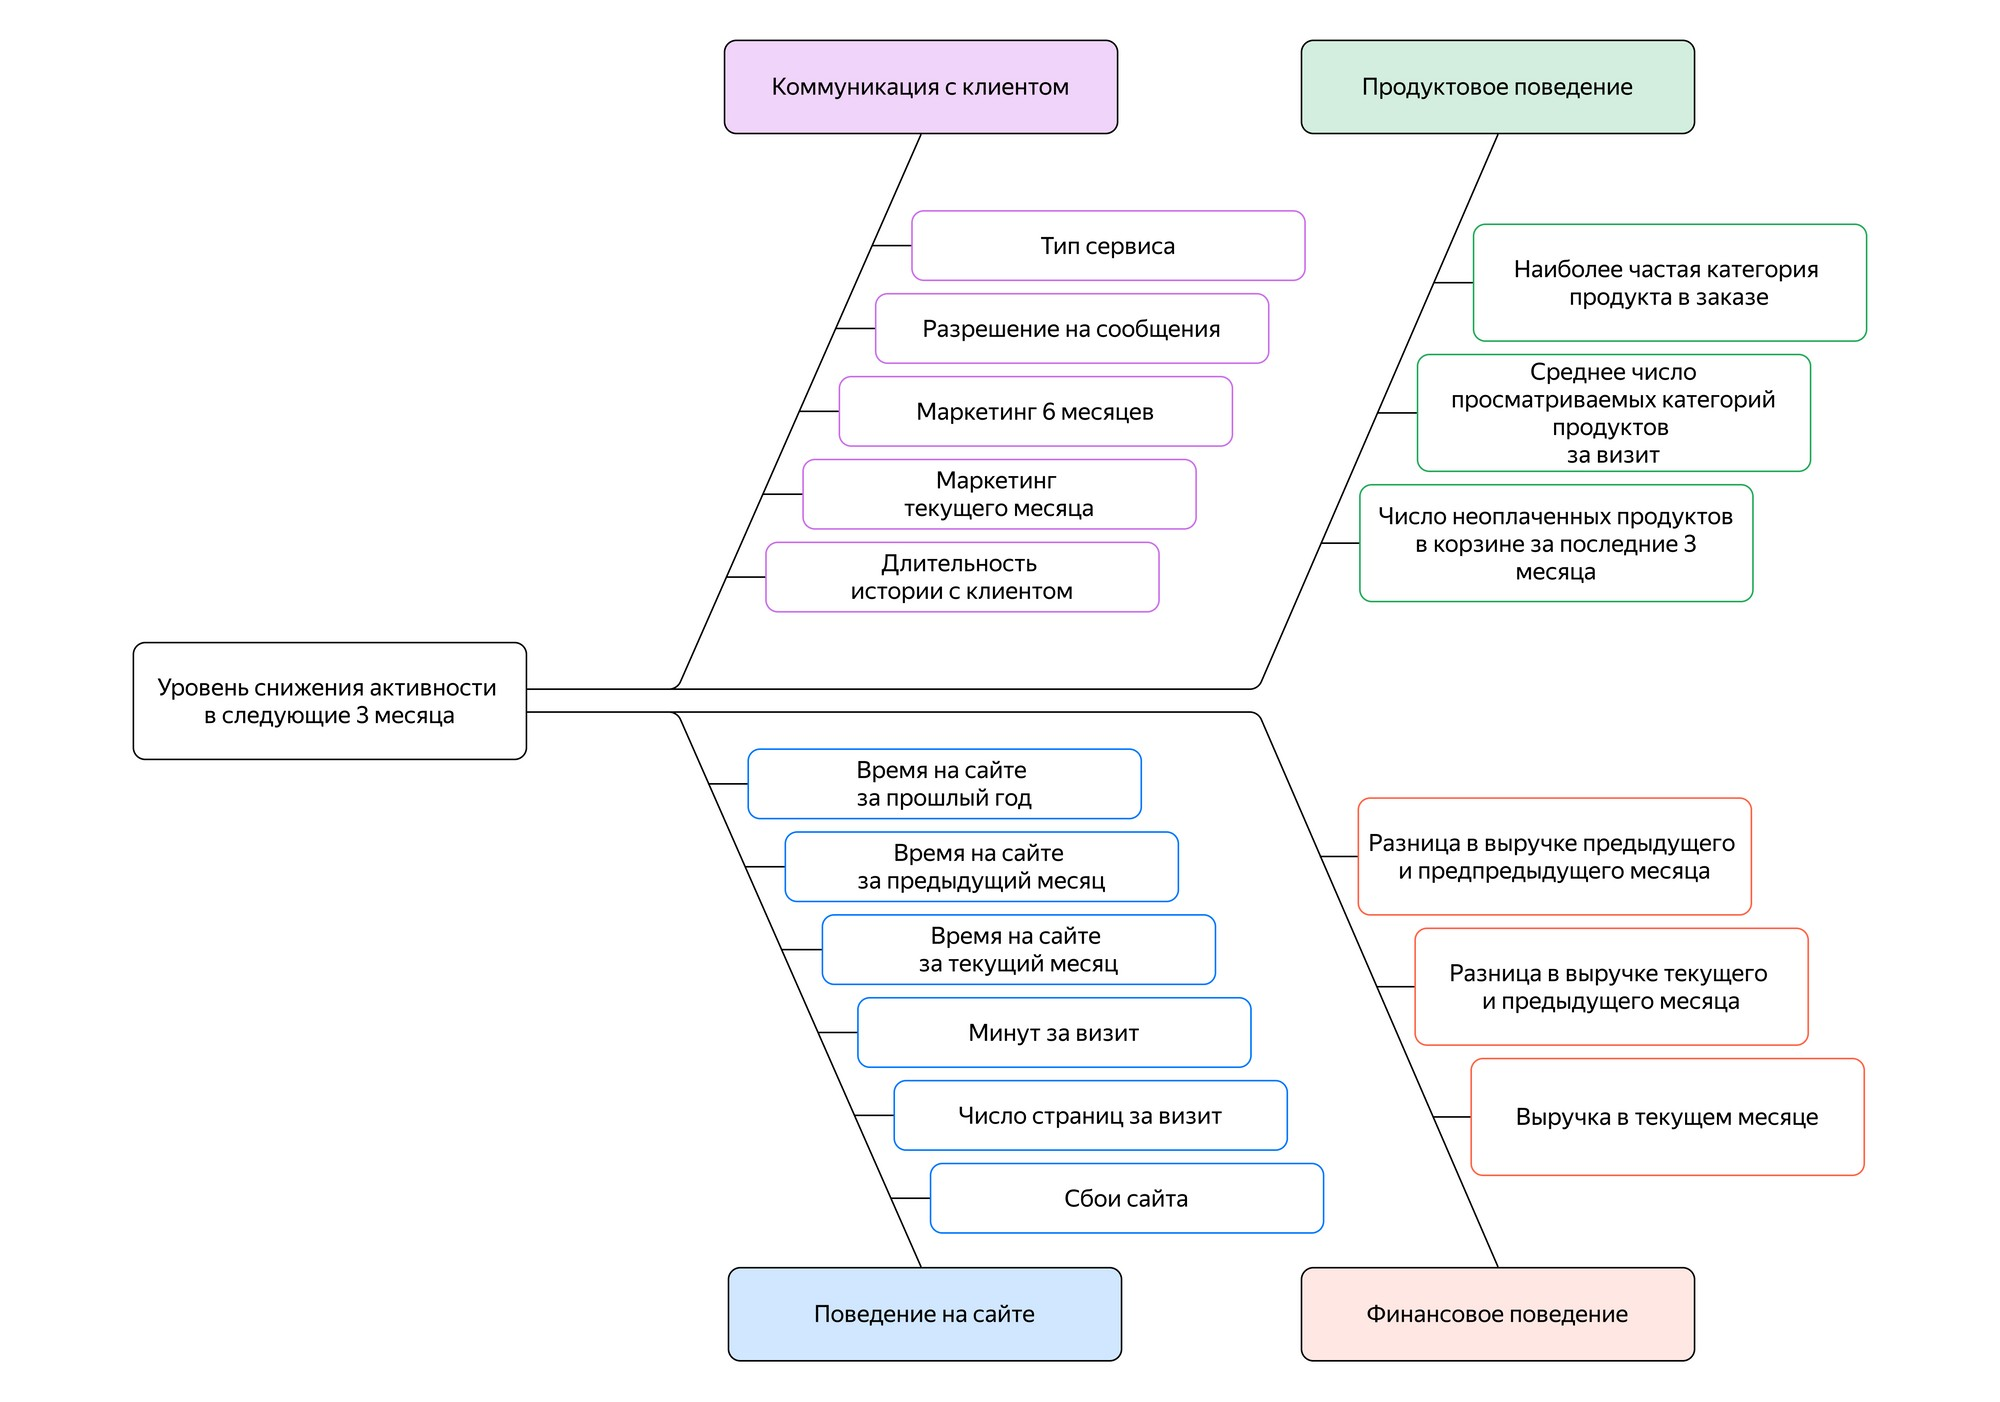

<ul>
    <li>Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.</li>
    <li>В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.</li>
    <li>Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.</li>
</ul>

In [1]:
!pip install phik -q
!pip install shap -q
!pip install -U scikit-learn -q

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import phik
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from scipy.stats import gaussian_kde
from sklearn.metrics import recall_score

warnings.filterwarnings('ignore')

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

#### Шаг 1. Загрузка данных

In [3]:
try:
    market_file = pd.read_csv('/datasets/market_file.csv', decimal='.')
    market_money = pd.read_csv('/datasets/market_money.csv', sep=',', decimal='.')
    market_time = pd.read_csv('/datasets/market_time.csv', sep=',', decimal=',')
    money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')
    print("Данные загружены")
    
    print("market_file shape:", market_file.shape)
    print("market_money shape:", market_money.shape)
    print("market_time shape:", market_time.shape)
    print("money shape:", money.shape)
    
except FileNotFoundError as e:
    print(f"Ошибка: {e}")

Данные загружены
market_file shape: (1300, 13)
market_money shape: (3900, 3)
market_time shape: (2600, 3)
money shape: (1300, 2)


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Обрати внимание, из-за неправильного указания разделителя дроби, некоторые признаки загружены в некорректном типе данных.~~</font>

<span style="color: purple; font-weight: bold">Комментарий студента<br> Поправил</span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

In [4]:
display (market_file.head())
market_file.info()


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [5]:
display (market_money.head())
print (market_money.info())

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None


In [6]:
display (market_time.head())
market_time.info()


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [7]:
display (money.head())
money.info()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


##### 1.1 Общий вывод по загрузке данных:<br>
Загрузка прошла отлично.<br>
В загруженных датасетах видны опечатки.<br>
В market_file столбцы Маркет_актив_6_мес и Акционные_покупки имеют тип object, и в market_money столбец Выручка также object, а должны быть float64.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Первичный осмотр проведен.</font>

#### Шаг 2. Предобработка данных

In [8]:
def safe_convert_to_float(series):
    if series.dtype == 'object':
        return series.str.replace(',', '.').astype(float)
    else:
        return series

market_file['Маркет_актив_6_мес'] = safe_convert_to_float(market_file['Маркет_актив_6_мес'])
market_file['Акционные_покупки'] = safe_convert_to_float(market_file['Акционные_покупки'])
market_money['Выручка'] = safe_convert_to_float(market_money['Выручка'])

In [9]:
def columns_rename(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

market_file = columns_rename(market_file)
market_money = columns_rename(market_money)
market_time = columns_rename(market_time)
money = columns_rename(money)

display(market_file.head())
display(market_money.head())
display(market_time.head())
display(money.head())

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [10]:
categorical_columns = market_file.select_dtypes(include=['object']).columns

for col in categorical_columns:
    if col != 'id':
        market_file[col] = market_file[col].str.lower()
        print(f"\n{col}:")
        print(f"Уникальные значения: {market_file[col].unique()}")

market_money['период'] = market_money['период'].str.lower()
print("период:", market_money['период'].unique())

market_time['период'] = market_time['период'].str.lower()
print("период:", market_time['период'].unique())


покупательская_активность:
Уникальные значения: ['снизилась' 'прежний уровень']

тип_сервиса:
Уникальные значения: ['премиум' 'стандартт' 'стандарт']

разрешить_сообщать:
Уникальные значения: ['да' 'нет']

популярная_категория:
Уникальные значения: ['товары для детей' 'домашний текстиль' 'косметика и аксесуары'
 'техника для красоты и здоровья' 'кухонная посуда'
 'мелкая бытовая техника и электроника']
период: ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']
период: ['текущий_месяц' 'предыдцщий_месяц']


In [11]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')
print(market_file['тип_сервиса'].unique())

['премиум' 'стандарт']


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [12]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
print(market_time['период'].unique())


['текущий_месяц' 'предыдущий_месяц']


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [13]:
market_money['период'] = market_money['период'].replace('препредыдущий_месяц', 'предпредыдущий_месяц')
print(market_money['период'].unique())

['предпредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [14]:
market_file['покупательская_активность'] = market_file['покупательская_активность'].str.replace(' ', '_')
market_file['популярная_категория'] = market_file['популярная_категория'].str.replace(' ', '_')
market_file['популярная_категория'] = market_file['популярная_категория'].str.replace('косметика_и_аксесуары', 'косметика_и_аксессуары')
print(market_file['популярная_категория'].unique())

['товары_для_детей' 'домашний_текстиль' 'косметика_и_аксессуары'
 'техника_для_красоты_и_здоровья' 'кухонная_посуда'
 'мелкая_бытовая_техника_и_электроника']


<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ⚠️\
<span style="color: darkorange"> Раз уж исправлем опечатки, то обрати внимание на 'аксесуары'.</span>

<span style="color: purple; font-weight: bold">Комментарий студента<br>Поправил</span>

In [15]:
print("market_file пропуски:")
print(market_file.isnull().sum())
print("\nmarket_money пропуски:")
print(market_money.isnull().sum())
print("\nmarket_time пропуски:")
print(market_time.isnull().sum())
print("\nmoney пропуски:")
print(money.isnull().sum())

print(f"market_file дубликаты: {market_file.duplicated().sum()}")
print(f"market_money дубликаты: {market_money.duplicated().sum()}")
print(f"market_time дубликаты: {market_time.duplicated().sum()}")
print(f"money дубликаты: {money.duplicated().sum()}")

market_file пропуски:
id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

market_money пропуски:
id         0
период     0
выручка    0
dtype: int64

market_time пропуски:
id        0
период    0
минут     0
dtype: int64

money пропуски:
id         0
прибыль    0
dtype: int64
market_file дубликаты: 0
market_money дубликаты: 0
market_time дубликаты: 0
money дубликаты: 0


##### 2.1 Общий вывод по предобработке данных

Была проведена предобработка данных. Исправленны некорректные типы данных. Названия столбцов и значения в них были приведены к единому стилю. Исправлены опечатки. Первоначально, дубликатов обнаружено не было. Пропуски отсутствуют.

#### Шаг 3. Исследовательский анализ данных

##### 3.1 Категориальные признаки market_file

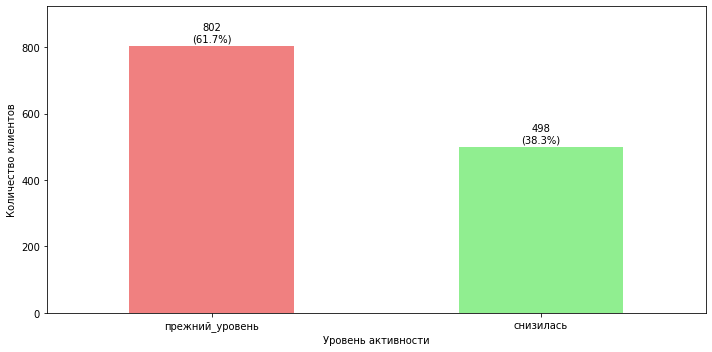

Покупательская активность:
• прежний_уровень: 802 клиентов (61.7%)
• снизилась: 498 клиентов (38.3%)



In [16]:
plt.figure(figsize=(10, 5))
value_counts_target = market_file['покупательская_активность'].value_counts()
bars1 = value_counts_target.plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.ylabel('Количество клиентов')
plt.xlabel('Уровень активности')
plt.xticks(rotation=0)

max_count1 = value_counts_target.max()
plt.ylim(0, max_count1 * 1.15)

for i, count in enumerate(value_counts_target.values):
    percentage = (count / len(market_file)) * 100
    plt.text(i, count + max_count1 * 0.01, f'{count}\n({percentage:.1f}%)', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Покупательская активность:")
for label, count in value_counts_target.items():
    print(f"• {label}: {count} клиентов ({count/len(market_file)*100:.1f}%)")
print()

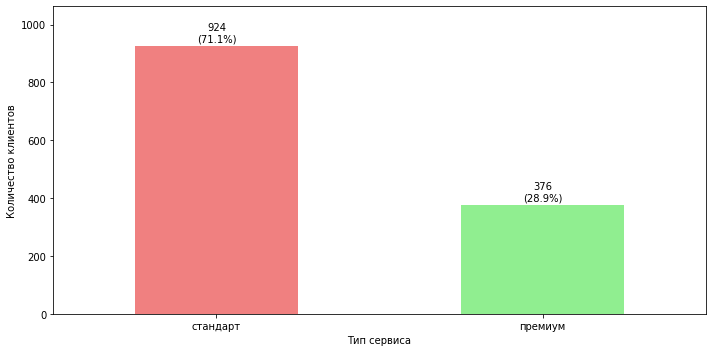

Тип сервиса:
• стандарт: 924 клиентов (71.1%)
• премиум: 376 клиентов (28.9%)



In [17]:
plt.figure(figsize=(10, 5))
value_counts_service = market_file['тип_сервиса'].value_counts()
bars2 = value_counts_service.plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.ylabel('Количество клиентов')
plt.xlabel('Тип сервиса')

max_count2 = value_counts_service.max()
plt.ylim(0, max_count2 * 1.15)

for i, count in enumerate(value_counts_service.values):
    percentage = (count / len(market_file)) * 100
    plt.text(i, count + max_count2 * 0.01, f'{count}\n({percentage:.1f}%)', 
             ha='center', va='bottom')

plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()

print("Тип сервиса:")
for label, count in value_counts_service.items():
    print(f"• {label}: {count} клиентов ({count/len(market_file)*100:.1f}%)")
print()

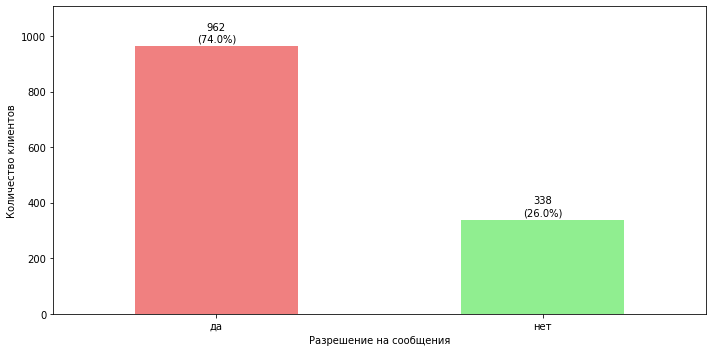

Разрешение на сообщения:
• да: 962 клиентов (74.0%)
• нет: 338 клиентов (26.0%)



In [18]:
plt.figure(figsize=(10, 5))
value_counts_consent = market_file['разрешить_сообщать'].value_counts()
bars3 = value_counts_consent.plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.ylabel('Количество клиентов')
plt.xlabel('Разрешение на сообщения')

max_count3 = value_counts_consent.max()
plt.ylim(0, max_count3 * 1.15)

for i, count in enumerate(value_counts_consent.values):
    percentage = (count / len(market_file)) * 100
    plt.text(i, count + max_count3 * 0.01, f'{count}\n({percentage:.1f}%)', 
             ha='center', va='bottom')

plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

print("Разрешение на сообщения:")
for label, count in value_counts_consent.items():
    print(f"• {label}: {count} клиентов ({count/len(market_file)*100:.1f}%)")
print()

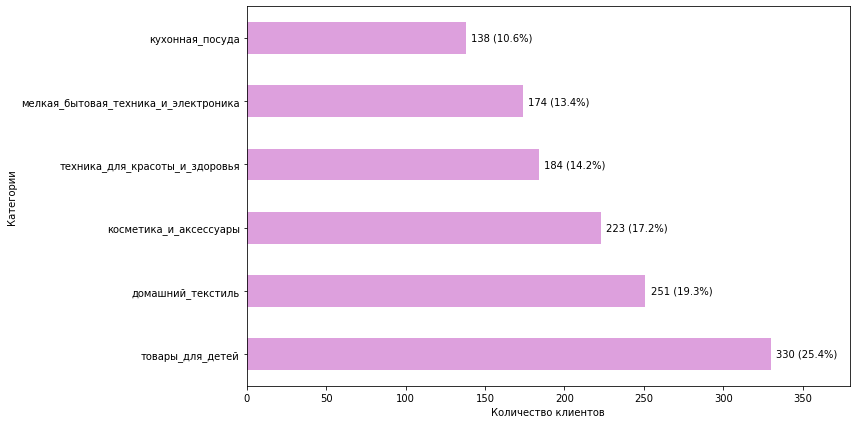

Популярные категории:
• товары_для_детей: 330 клиентов (25.4%)
• домашний_текстиль: 251 клиентов (19.3%)
• косметика_и_аксессуары: 223 клиентов (17.2%)
• техника_для_красоты_и_здоровья: 184 клиентов (14.2%)
• мелкая_бытовая_техника_и_электроника: 174 клиентов (13.4%)
• кухонная_посуда: 138 клиентов (10.6%)


In [19]:
plt.figure(figsize=(12, 6))
value_counts_category = market_file['популярная_категория'].value_counts().head(10)
bars4 = value_counts_category.plot(kind='barh', color='plum')
plt.xlabel('Количество клиентов')
plt.ylabel('Категории')

max_count4 = value_counts_category.max()
plt.xlim(0, max_count4 * 1.15)

for i, count in enumerate(value_counts_category.values):
    percentage = (count / len(market_file)) * 100
    plt.text(count + max_count4 * 0.01, i, f'{count} ({percentage:.1f}%)', 
             va='center')

plt.tight_layout()
plt.show()

print("Популярные категории:")
for label, count in value_counts_category.items():
    print(f"• {label}: {count} клиентов ({count/len(market_file)*100:.1f}%)")

Промежуточный вывод<br>
В целевом признаке заметен дисбаланс данных, прежний уровен - 802 (61,7%), снизилась - 498 (38,3%), который может в последствии отобразиться на модели.<br>
Логичное распределение между премиум и стандарт клиентами. Премиум - 924 (71,1%), стандарт - 376 (28,9%).<br>
Большинство пользователей согласны на рассылки. Это хорошо для маркетинга. Да - 962 (74%), нет - 338 (26%).<br>
Лидирует категория товары для детей - 330 (25,4%). Распределение по категориям равномерное, без явного доминирования.

##### 3.2 Количественные признаки  market_file

In [20]:
market_file.drop(columns=['id']).describe().T

,count,mean,std,min,25%,50%,75%,max
маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.9,6.60
маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.0,5.00
длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.0,1079.00
акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.3,0.99
средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.0,6.00
неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.0,10.00
ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.0,9.00
страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.0,20.00


Промежуточный вывод<br>
Медианы в маркет_актив_6_мес и маркет_актив_тек_мес 4,25 и 4,01 соотв., показывают стабильную вовлеченность пользователей.<br>
Показатель длительности с медианой в 602 дня, говорит о лояльности аудитории.<br>
На основе данных из страниц_за_визит и средний_просмотр_категорий_за_визит, 8,76 и 3,27 соотв., можно заметить, что пользователи перемещаются по сайту, но категории изучают лишь поверхностно.<br>
Акционные_покупки - 32%, в среднем умеренная зависимость от акций.

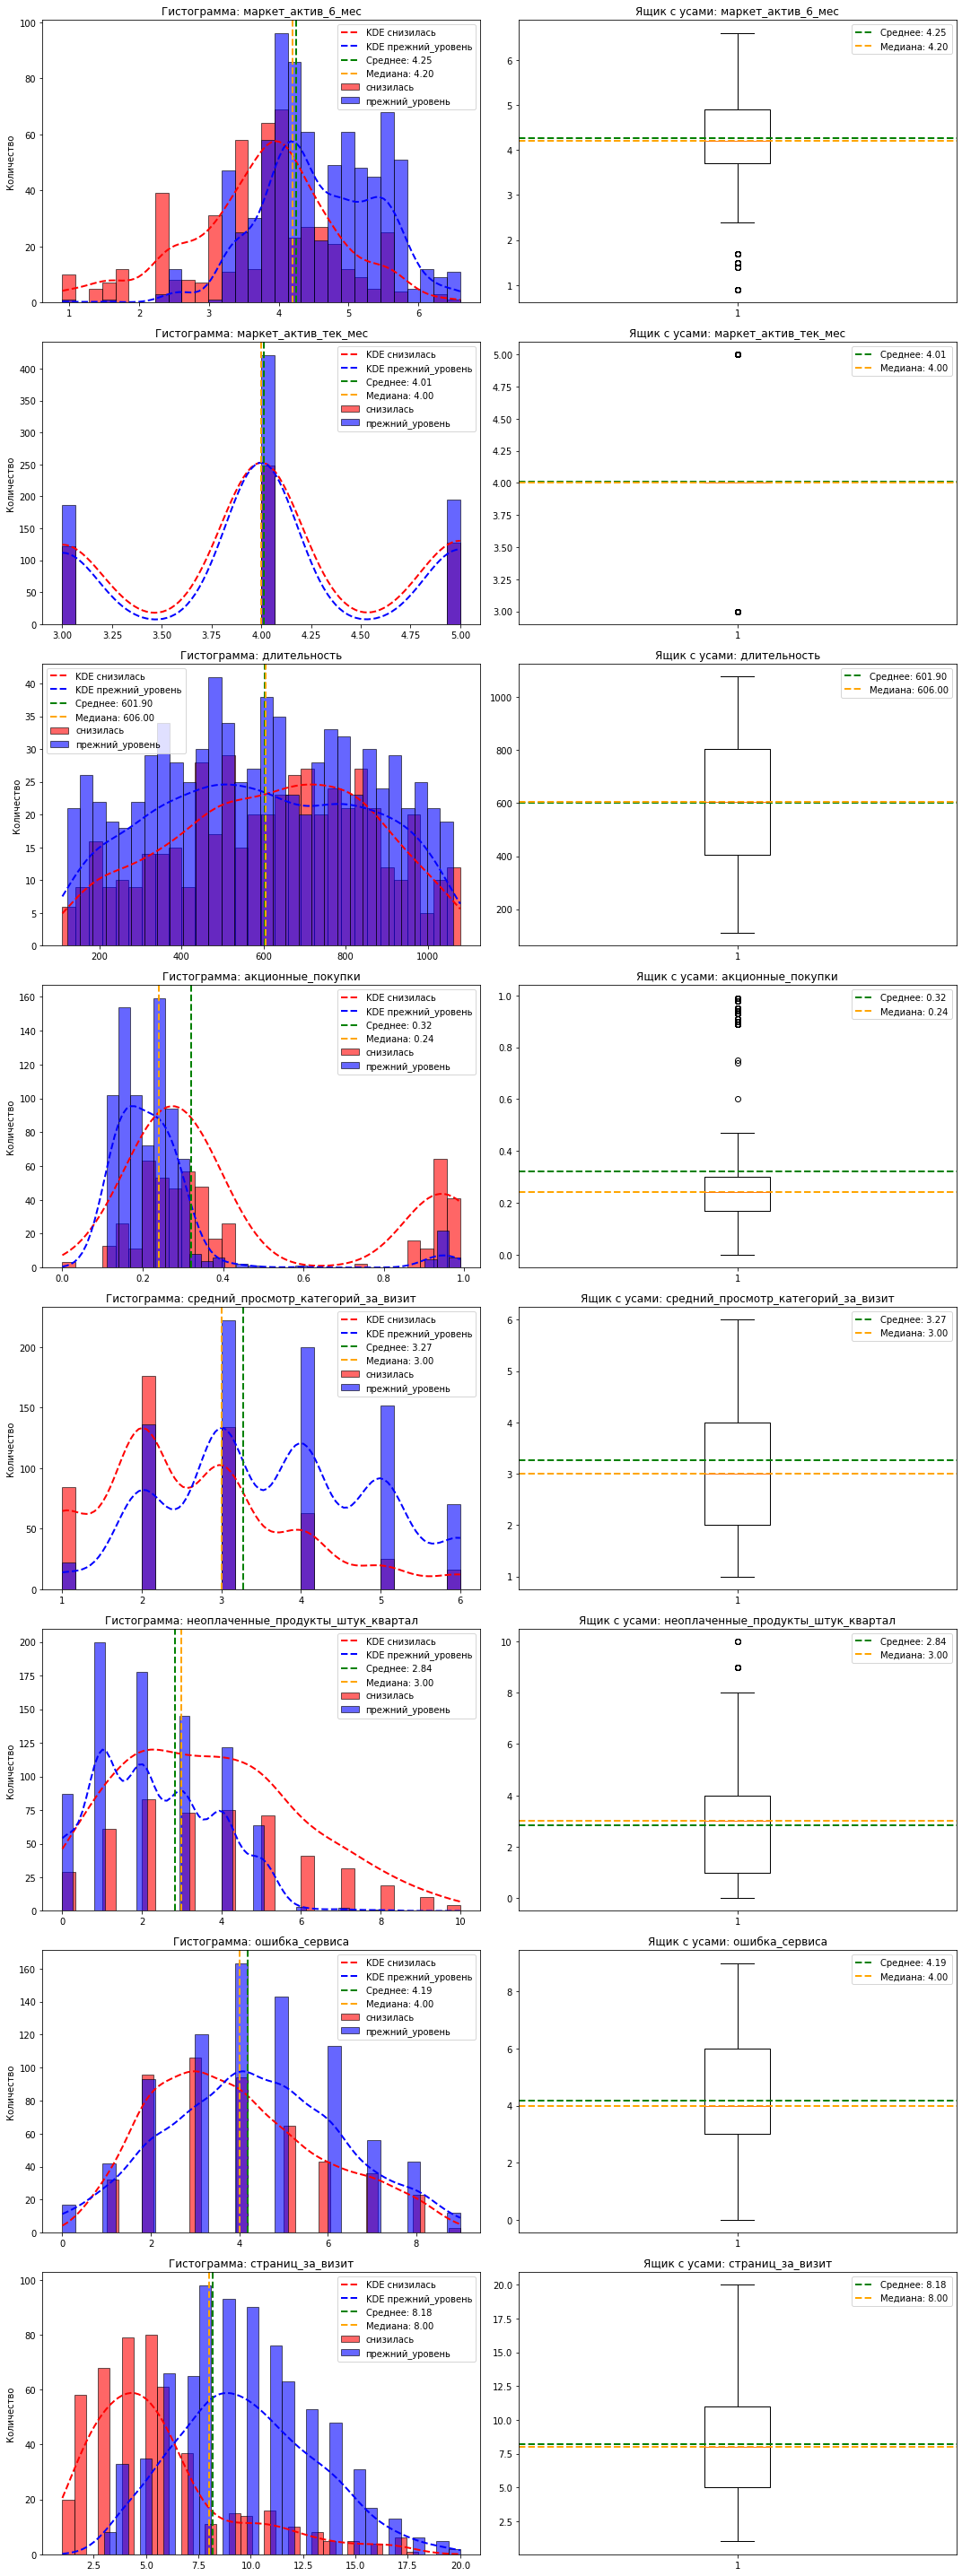

In [21]:
numeric_features = [
    'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
    'акционные_покупки', 'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит'
]

fig, axes = plt.subplots(len(numeric_features), 2, figsize=(15, 5*len(numeric_features)))

for i, feature in enumerate(numeric_features):
    data = market_file[feature]
    mean_val = data.mean()
    median_val = data.median()
    
    activity_types = market_file['покупательская_активность'].unique()
    colors = ['red', 'blue']
    labels = ['снизилась', 'прежний_уровень']
    
    all_heights = []
    for j, activity_type in enumerate(activity_types):
        subset_data = market_file[market_file['покупательская_активность'] == activity_type][feature]
        n, bins, patches = axes[i, 0].hist(subset_data, bins=30, alpha=0.6, color=colors[j], 
                                         edgecolor='black', label=labels[j])
        all_heights.extend(n)
    
    x_range = np.linspace(data.min(), data.max(), 100)
    
    if all_heights:
        hist_max = max(all_heights)
        
        for j, activity_type in enumerate(activity_types):
            subset_data = market_file[market_file['покупательская_активность'] == activity_type][feature]
            if len(subset_data) > 1:
                kde = gaussian_kde(subset_data)
                kde_curve = kde(x_range)
                
                kde_max = kde_curve.max()
                scale_factor = hist_max / kde_max * 0.6  
                
                axes[i, 0].plot(x_range, kde_curve * scale_factor, color=colors[j], 
                              linewidth=2, linestyle='--', label=f'KDE {labels[j]}')
    
    axes[i, 0].axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.2f}')
    axes[i, 0].axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Медиана: {median_val:.2f}')
    axes[i, 0].set_title(f'Гистограмма: {feature}')
    axes[i, 0].set_ylabel('Количество')
    axes[i, 0].legend()

    axes[i, 1].boxplot(data)
    axes[i, 1].axhline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.2f}')
    axes[i, 1].axhline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Медиана: {median_val:.2f}')
    axes[i, 1].set_title(f'Ящик с усами: {feature}')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

Промежуточный вывод<br>
Маркет_актив_6_мес. Среднее и медианы близки друг к другу 4,25 и 4,20 соотв. Видны выбросы за пределами значения 2, стоит в дальнейшем на них взглянуть. Покупательская активность сохранилась у тех, кто чаще получает маркетинговые предложения, более четырех раз за пол года.<br>
Маркет_актив_тек_мес. В среднем, в текущем месяце, пользователи получают 4 маркетинговых предложения.<br>
Длительность. Возраст аккаунта, в целом, никак не сказывается на активности. Но пользователи, которые зарегестрированы  600 и менее дней, более активны. Концентрация пользователей, у которых снизилась активность, находится за пределами медианы 606 дней. <br>
Акционные_покупки. Имеет выраженное бимодальное распределение. Тех кто следит за акциями и тех, кому они не сильно интересны. В дальнейшем стоит его вынести в категориальные признаки.<br>
Средний_просмотр_категорий_за_визит</font>. Если пользовател смотрит более двух категорий, его покупательская активность стабильнее.<br>
Неоплаченные_продукты_штук_квартал. Заметно низкая покупательская активность у пользователей, у которых более 5 неоплаченных товаров, в корзине, за последние 3 месяца.<br>
Ошибка_сервиса. Тяжело сделать какой-либо первоначальный вывод. В среднем 4 ошибки за 3 месяца. Если смотреть в целом, это не так много, чтобы повлиять на покупательскую активность.<br>
Страниц_за_визит. Чем больше пользователь посещает страниц за визит, тем стабильнее его покупательская активность.<br>

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

In [22]:
market_file[market_file['маркет_актив_6_мес'] < 2.4]

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
30,215378,снизилась,стандарт,да,1.7,3,488,0.39,техника_для_красоты_и_здоровья,5,1,4,3
32,215380,снизилась,премиум,нет,1.7,4,637,0.94,техника_для_красоты_и_здоровья,3,2,4,7
38,215386,снизилась,стандарт,да,1.5,3,495,0.98,домашний_текстиль,2,3,7,5
47,215395,снизилась,премиум,да,1.5,5,645,0.27,товары_для_детей,3,3,6,5
55,215403,снизилась,премиум,да,1.7,5,771,0.39,техника_для_красоты_и_здоровья,1,8,2,5
61,215409,снизилась,премиум,да,1.4,4,857,0.95,кухонная_посуда,3,4,5,5
63,215411,снизилась,стандарт,да,1.7,4,756,0.33,товары_для_детей,2,3,7,4
70,215418,снизилась,стандарт,нет,1.7,4,472,0.94,домашний_текстиль,2,6,4,3
81,215429,снизилась,премиум,нет,0.9,4,690,0.24,домашний_текстиль,2,5,7,4
108,215456,снизилась,стандарт,да,1.7,4,449,0.23,косметика_и_аксессуары,3,4,4,5


In [23]:
low_marketing = market_file[market_file['маркет_актив_6_мес'] < 2.4]

print(f"Всего клиентов: {len(low_marketing)}")
print(f"Доля от общей базы: {len(low_marketing)/len(market_file)*100:.1f}%")
print()

activity_dist = low_marketing['покупательская_активность'].value_counts()
print("Распределение по активности:")
for activity, count in activity_dist.items():
    percentage = count/len(low_marketing)*100
    print(f"- {activity}: {count} клиентов ({percentage:.1f}%)")
print()

service_dist = low_marketing['тип_сервиса'].value_counts()
print("Распределение по типу сервиса:")
for service, count in service_dist.items():
    percentage = count/len(low_marketing)*100
    print(f"- {service}: {count} клиентов ({percentage:.1f}%)")
print()

consent_dist = low_marketing['разрешить_сообщать'].value_counts()
print("Разрешения на сообщения:")
for consent, count in consent_dist.items():
    percentage = count/len(low_marketing)*100
    print(f"- {consent}: {count} клиентов ({percentage:.1f}%)")
print()

Всего клиентов: 36
Доля от общей базы: 2.8%

Распределение по активности:
- снизилась: 34 клиентов (94.4%)
- прежний_уровень: 2 клиентов (5.6%)

Распределение по типу сервиса:
- стандарт: 22 клиентов (61.1%)
- премиум: 14 клиентов (38.9%)

Разрешения на сообщения:
- да: 25 клиентов (69.4%)
- нет: 11 клиентов (30.6%)



Промежуточный вывод<br>
Итого 36 клиентов из 1300 (2,8%). Лишь у двоих остался прежний уровень активности. Ничем особым на фоне других пользователей они не отличаются, кроме того, что они дольше зарегестрированы.


##### 3.3 Количественные признаки market_money

In [24]:
market_money.drop(columns=['id']).describe().T

,count,mean,std,min,25%,50%,75%,max
выручка,3900.0,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.0,106862.2


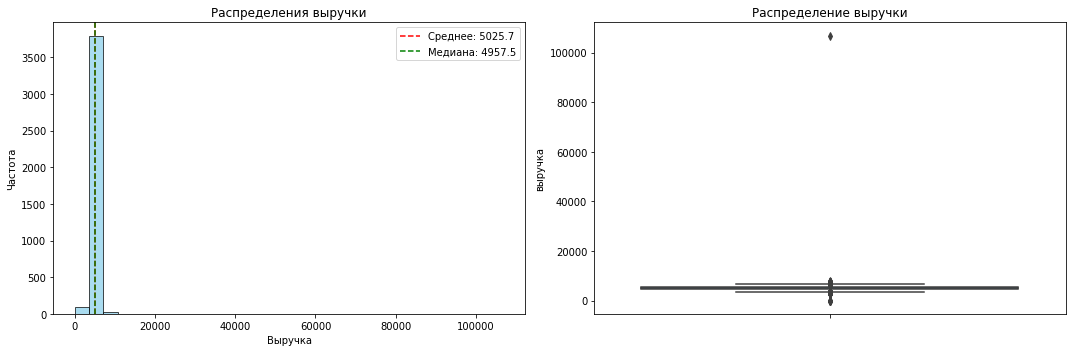

Общая статистика выручки:
Среднее: 5025.70
Медиана: 4957.50

Статистика по периодам:
                         mean   median
период                                
предпредыдущий_месяц  4825.21  4809.00
предыдущий_месяц      4936.92  5005.00
текущий_месяц         5314.96  5179.95


In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(market_money['выручка'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(market_money['выручка'].mean(), color='red', linestyle='--', label=f'Среднее: {market_money["выручка"].mean():.1f}')
plt.axvline(market_money['выручка'].median(), color='green', linestyle='--', label=f'Медиана: {market_money["выручка"].median():.1f}')
plt.title('Распределения выручки')
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(data=market_money, y='выручка')
plt.title('Распределение выручки')
plt.tight_layout()
plt.show()

print("Общая статистика выручки:")
print(f"Среднее: {market_money['выручка'].mean():.2f}")
print(f"Медиана: {market_money['выручка'].median():.2f}")

print("\nСтатистика по периодам:")
period_stats = market_money.groupby('период')['выручка'].agg(['mean', 'median']).round(2)
print(period_stats)

In [26]:
market_money.query('выручка > 100000')

,id,период,выручка
98,215380,текущий_месяц,106862.2


In [27]:
print(f"\nID 215380 в market_file: {215380 in market_file['id'].values}")
print(f"ID 215380 в market_money: {215380 in market_money['id'].values}")
print(f"ID 215380 в market_time: {215380 in market_time['id'].values}")
print(f"ID 215380 в money: {215380 in money['id'].values}")


ID 215380 в market_file: True
ID 215380 в market_money: True
ID 215380 в market_time: True
ID 215380 в money: True


In [28]:
client_info = {
    'ID': [215380],
    'Активность': market_file[market_file['id'] == 215380]['покупательская_активность'].values,
    'Тип_сервиса': market_file[market_file['id'] == 215380]['тип_сервиса'].values,
    'Разрешение_сообщения': market_file[market_file['id'] == 215380]['разрешить_сообщать'].values,
    'Популярная_категория': market_file[market_file['id'] == 215380]['популярная_категория'].values,
    'Акционные_покупки': market_file[market_file['id'] == 215380]['акционные_покупки'].values,
    'Прибыль': money[money['id'] == 215380]['прибыль'].values
}

client_df = pd.DataFrame(client_info)
display(client_df)

,ID,Активность,Тип_сервиса,Разрешение_сообщения,Популярная_категория,Акционные_покупки,Прибыль
0,215380,снизилась,премиум,нет,техника_для_красоты_и_здоровья,0.94,3.88


Промежуточный вывод<br>
Выброс похож на аномалию, т.к. при выручке в 106862.2, имеет прибыль лишь 3.88 у.е.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Действительно явный выброс.
Можно удалить, а можно и заполнить, например значением предыдущего месяца.</font>

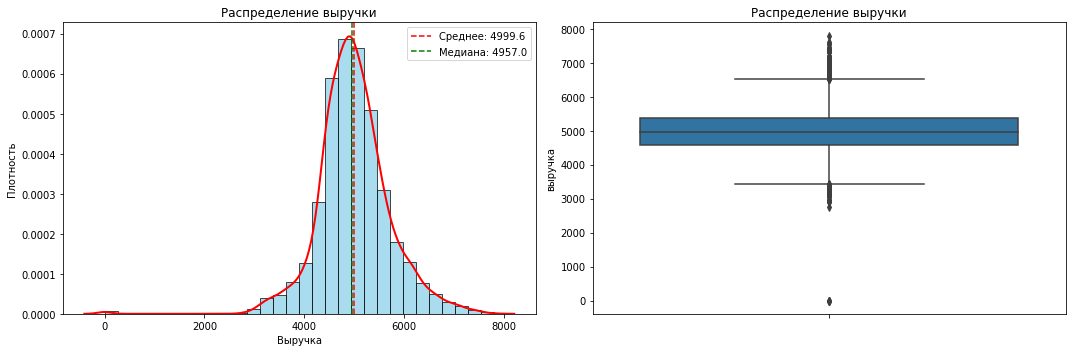

Общая статистика выручки (без выброса >100000):
Среднее: 4999.58
Медиана: 4957.00

Статистика по периодам (без выброса >100000):
                         mean  median
период                               
предпредыдущий_месяц  4825.21  4809.0
предыдущий_месяц      4936.92  5005.0
текущий_месяц         5236.79  5179.6


In [29]:
filtered_money = market_money[market_money['выручка'] <= 100000]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(filtered_money['выручка'], bins=30, alpha=0.7, color='skyblue', edgecolor='black', density=True)
sns.kdeplot(filtered_money['выручка'], color='red', linewidth=2)
plt.axvline(filtered_money['выручка'].mean(), color='red', linestyle='--', label=f'Среднее: {filtered_money["выручка"].mean():.1f}')
plt.axvline(filtered_money['выручка'].median(), color='green', linestyle='--', label=f'Медиана: {filtered_money["выручка"].median():.1f}')
plt.title('Распределение выручки')
plt.xlabel('Выручка')
plt.ylabel('Плотность')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_money, y='выручка')
plt.title('Распределение выручки')
plt.tight_layout()
plt.show()

print("Общая статистика выручки (без выброса >100000):")
print(f"Среднее: {filtered_money['выручка'].mean():.2f}")
print(f"Медиана: {filtered_money['выручка'].median():.2f}")

print("\nСтатистика по периодам (без выброса >100000):")
period_stats = filtered_money.groupby('период')['выручка'].agg(['mean', 'median']).round(2)
print(period_stats)

In [30]:
market_money.query('выручка < 1')

,id,период,выручка
0,215348,предпредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,предпредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,предпредыдущий_месяц,0.0


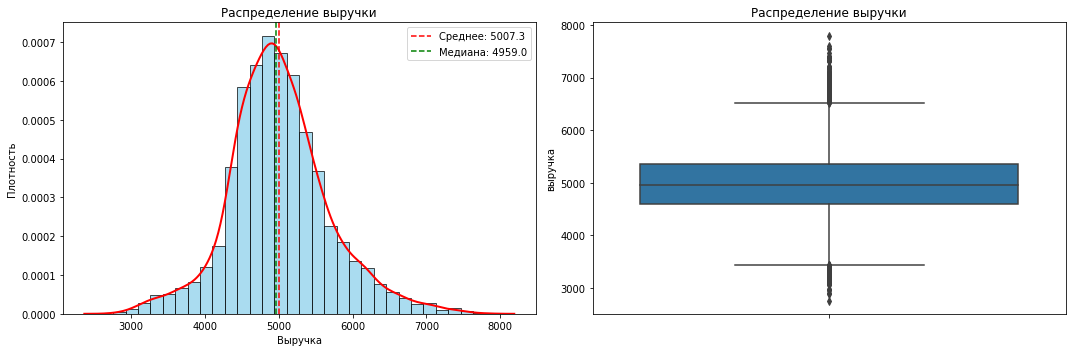

Общая статистика выручки (без выброса >100000 и <1):
Среднее: 5007.28
Медиана: 4959.00

Количество записей после фильтрации: 3893
Отсеяно записей: 7

Статистика по периодам:
                         mean  median
период                               
предпредыдущий_месяц  4836.37  4812.0
предыдущий_месяц      4948.34  5005.5
текущий_месяц         5236.79  5179.6


In [31]:
filtered_money = market_money[(market_money['выручка'] <= 100000) & (market_money['выручка'] >= 1)]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(filtered_money['выручка'], bins=30, alpha=0.7, color='skyblue', edgecolor='black', density=True)
sns.kdeplot(filtered_money['выручка'], color='red', linewidth=2)
plt.axvline(filtered_money['выручка'].mean(), color='red', linestyle='--', label=f'Среднее: {filtered_money["выручка"].mean():.1f}')
plt.axvline(filtered_money['выручка'].median(), color='green', linestyle='--', label=f'Медиана: {filtered_money["выручка"].median():.1f}')
plt.title('Распределение выручки')
plt.xlabel('Выручка')
plt.ylabel('Плотность')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_money, y='выручка')
plt.title('Распределение выручки')
plt.tight_layout()
plt.show()

print("Общая статистика выручки (без выброса >100000 и <1):")
print(f"Среднее: {filtered_money['выручка'].mean():.2f}")
print(f"Медиана: {filtered_money['выручка'].median():.2f}")

print(f"\nКоличество записей после фильтрации: {len(filtered_money)}")
print(f"Отсеяно записей: {len(market_money) - len(filtered_money)}")

print("\nСтатистика по периодам:")
period_stats = filtered_money.groupby('период')['выручка'].agg(['mean', 'median']).round(2)
print(period_stats)

In [32]:
market_money = market_money[(market_money['выручка'] > 0) & (market_money['выручка'] < 100000)]

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Неактивные удалены 👌</font>

Промежуточный вывод<br>
Отсеяны пользователи с выручкой 0 и аномальное значение свыше 100000. Распределение нормальное, с симметричным характером, с выраженным пиком. Среднее и медиана блики 5007,3 и 4959 соотв.<br>
Большинство выручки от 4000 до 6000.

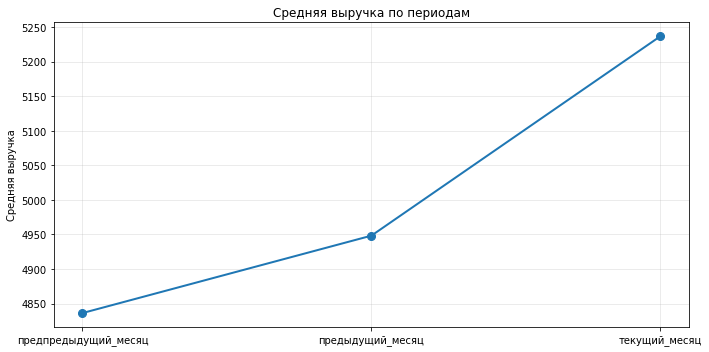

In [33]:
plt.figure(figsize=(10, 5))
period_means = filtered_money.groupby('период')['выручка'].mean().sort_index()
plt.plot(period_means.index, period_means.values, marker='o', linewidth=2, markersize=8)
plt.title('Средняя выручка по периодам')
plt.ylabel('Средняя выручка')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Промежуточный вывод<>
В целом динамика выручки положительная и растет.

##### 3.4 Категориальные признаки market_money

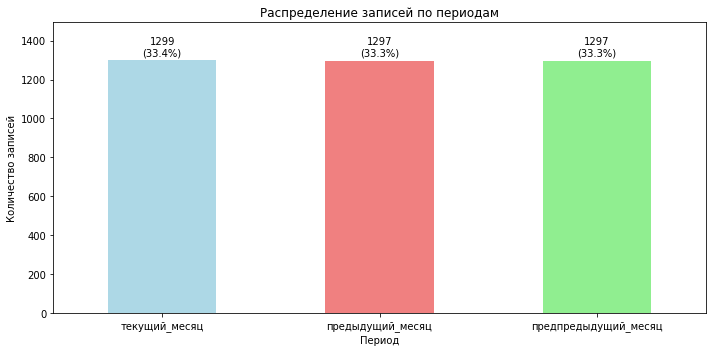

Распределение по периодам:
• текущий_месяц: 1299 записей (33.4%)
• предыдущий_месяц: 1297 записей (33.3%)
• предпредыдущий_месяц: 1297 записей (33.3%)



In [34]:
plt.figure(figsize=(10, 5))
value_counts_period = market_money['период'].value_counts()
bars_period = value_counts_period.plot(kind='bar', color=['lightblue', 'lightcoral', 'lightgreen'])
plt.ylabel('Количество записей')
plt.xlabel('Период')
plt.title('Распределение записей по периодам')

max_count_period = value_counts_period.max()
plt.ylim(0, max_count_period * 1.15)

for i, count in enumerate(value_counts_period.values):
    percentage = (count / len(market_money)) * 100
    plt.text(i, count + max_count_period * 0.01, f'{count}\n({percentage:.1f}%)', 
             ha='center', va='bottom')

plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

print("Распределение по периодам:")
for label, count in value_counts_period.items():
    print(f"• {label}: {count} записей ({count/len(market_money)*100:.1f}%)")
print()

##### 3.5 Категориальные признаки market_time


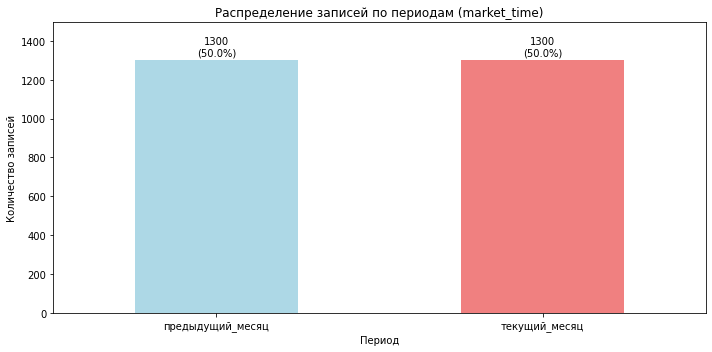

Распределение по периодам (market_time):
• предыдущий_месяц: 1300 записей (50.0%)
• текущий_месяц: 1300 записей (50.0%)



In [35]:
plt.figure(figsize=(10, 5))
value_counts_time = market_time['период'].value_counts()
bars_time = value_counts_time.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.ylabel('Количество записей')
plt.xlabel('Период')
plt.title('Распределение записей по периодам (market_time)')

max_count_time = value_counts_time.max()
plt.ylim(0, max_count_time * 1.15)

for i, count in enumerate(value_counts_time.values):
    percentage = (count / len(market_time)) * 100
    plt.text(i, count + max_count_time * 0.01, f'{count}\n({percentage:.1f}%)', 
             ha='center', va='bottom')

plt.xticks(rotation=0) 
plt.tight_layout()
plt.show()

print("Распределение по периодам (market_time):")
for label, count in value_counts_time.items():
    print(f"• {label}: {count} записей ({count/len(market_time)*100:.1f}%)")
print()

##### 3.6 Количественные признаки market_time


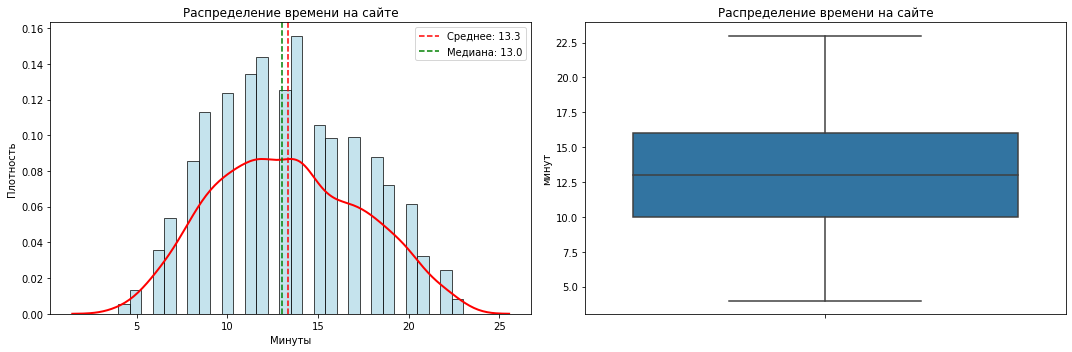

Общая статистика времени на сайте (минуты):
Среднее: 13.34
Медиана: 13.00

Статистика по периодам:
                   mean  median
период                         
предыдущий_месяц  13.47      13
текущий_месяц     13.20      13


In [36]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(market_time['минут'], bins=30, alpha=0.7, color='lightblue', edgecolor='black', density=True)
sns.kdeplot(market_time['минут'], color='red', linewidth=2)
plt.axvline(market_time['минут'].mean(), color='red', linestyle='--', label=f'Среднее: {market_time["минут"].mean():.1f}')
plt.axvline(market_time['минут'].median(), color='green', linestyle='--', label=f'Медиана: {market_time["минут"].median():.1f}')
plt.title('Распределение времени на сайте')
plt.xlabel('Минуты')
plt.ylabel('Плотность')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(data=market_time, y='минут')
plt.title('Распределение времени на сайте')
plt.tight_layout()
plt.show()

print("Общая статистика времени на сайте (минуты):")
print(f"Среднее: {market_time['минут'].mean():.2f}")
print(f"Медиана: {market_time['минут'].median():.2f}")

print("\nСтатистика по периодам:")
period_stats = market_time.groupby('период')['минут'].agg(['mean', 'median']).round(2)
print(period_stats)

Промежуточный вывод<br>
В среднем, пользователи проводят на сайте 13,3 минуты (что близко к медиане - 13). Распределение близко к нормальному. Выбросы отсутствуют.

##### 3.7 Количественные признаки money


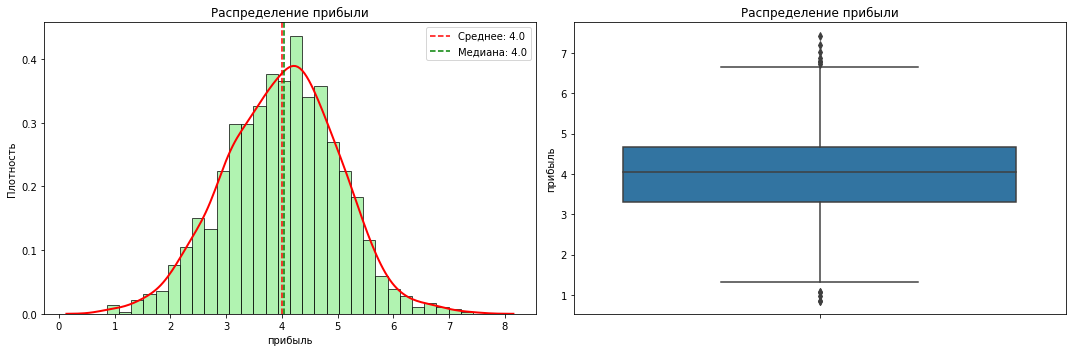

Общая статистика прибыли:
Среднее: 4.00
Медиана: 4.04
Количество записей: 1300


In [37]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(money['прибыль'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black', density=True)
sns.kdeplot(money['прибыль'], color='red', linewidth=2)
plt.axvline(money['прибыль'].mean(), color='red', linestyle='--', label=f'Среднее: {money["прибыль"].mean():.1f}')
plt.axvline(money['прибыль'].median(), color='green', linestyle='--', label=f'Медиана: {money["прибыль"].median():.1f}')
plt.title('Распределение прибыли')
plt.ylabel('Плотность')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(data=money, y='прибыль')
plt.title('Распределение прибыли')
plt.tight_layout()
plt.show()

print("Общая статистика прибыли:")
print(f"Среднее: {money['прибыль'].mean():.2f}")
print(f"Медиана: {money['прибыль'].median():.2f}")
print(f"Количество записей: {len(money)}")

Промежуточный вывод<br>
Среднее и медиана прибыли почти одинакова и равна 4. Распределение близко к нормальному. Выбросы отсутствуют.

##### 3.8 Отбор клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период

In [38]:
client_active_months = market_money[market_money['выручка'] > 0].groupby('id')['период'].nunique()

active_clients_3months = client_active_months[client_active_months >= 3].index

print(f"Всего уникальных клиентов в market_money: {market_money['id'].nunique()}")
print(f"Клиентов с активностью не менее 3 месяцев: {len(active_clients_3months)}")
print(f"Доля активных клиентов: {len(active_clients_3months) / market_money['id'].nunique() * 100:.1f}%")

print("\nРаспределение клиентов по количеству активных месяцев:")
month_distribution = client_active_months.value_counts().sort_index()
for months, count in month_distribution.items():
    print(f"• {months} месяцев: {count} клиентов ({count/len(client_active_months)*100:.1f}%)")

market_file_active = market_file[market_file['id'].isin(active_clients_3months)]
market_money_active = market_money[market_money['id'].isin(active_clients_3months)]
market_time_active = market_time[market_time['id'].isin(active_clients_3months)]
money_active = money[money['id'].isin(active_clients_3months)]

Всего уникальных клиентов в market_money: 1300
Клиентов с активностью не менее 3 месяцев: 1296
Доля активных клиентов: 99.7%

Распределение клиентов по количеству активных месяцев:
• 1 месяцев: 3 клиентов (0.2%)
• 2 месяцев: 1 клиентов (0.1%)
• 3 месяцев: 1296 клиентов (99.7%)


Промежуточный вывод<br>
Отсутствуют пользователи, которые ничего не покупали за 3 месяца.<br>
3 пользователя покупали лишь в 1 из 3 месяцев.

##### 3.9 Общий вывод по исследовательскому анализу

На основе EDA выявлено следующее:<br>
**Демография и поведение**
- База состоит из 1300 клиентов, с дисбалансов в целевом признаке. 61,7% сохранили активность, 38,3% снизили.
- Преобладают клиенты без премиума 71,1%. Большинство из пользователей согласны на рассылки - 74%
- Распределение по товарным категория равномерное, лидируют товары для детей - 25%

**Поведенческие паттерны**
- Клиенты демонстрируют высокую лояльность, медиана возраста аккаунта - 602 дня
- Среднее время на сайте - 13,3 минуты, при этом, пользователи просматривают примерно 8 страниц за сеанс
- Зависимость от акций низкая. В среднем, 32% покупок совершается по акциям (медиана - 0,24)

**Заметные проблемы**

- Брошенные корзины. Более 5 товаров за квартал, так и остаются лежать в корзине
- Большой количество просмотра категорий при низком показатели страниц за визит. Пользователи изучают товары поверхностно и не углубляются

После обработки, данные чистые без пропусков и дубликватов. Готовы для моделирования. Создан датасет пользователей, с покупательской активностью не менее трех месяцев.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Хорошая работа в части исследования данных: молодец, что используешь функции, а также применяешь подходящие для типов данных инструменты.</font>

#### Шаг 4. Объединение таблиц

In [39]:
market_merged = market_file\
    .merge(market_money.pivot_table('выручка', 'id', 'период').add_prefix('выручка_'), on='id')\
    .merge(market_time.pivot_table('минут', 'id', 'период').add_prefix('минут_'), on='id')

print("Размер объединенной таблицы:", market_merged.shape)
print("\nСтолбцы объединенной таблицы:")
print(market_merged.columns.tolist())
display(market_merged.head())

Размер объединенной таблицы: (1300, 18)

Столбцы объединенной таблицы:
['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'популярная_категория', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предпредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предпредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары_для_детей,6,2,1,5,NaN,NaN,3293.1,13,14
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5,4472.0,5216.0,4971.6,12,10
2,215350,снизилась,стандарт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13
3,215351,снизилась,стандарт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4,4793.0,6158.0,6610.4,11,13
4,215352,снизилась,стандарт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2,4594.0,5807.5,5872.5,8,11


In [40]:
market_merged = market_merged.dropna()

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Таблицы можно "развернуть вширь" по id  методом pivot_table. Необязательно прописывать каждую колонку.</font>

<span style="color: purple; font-weight: bold">Комментарий студента<br>Поправил</span>

In [41]:
market_merged.shape 

(1296, 18)

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red">~~Обрати внимание, у нас снова 1300 покупателей, включая неактивных и пользователя с аномальной выручкой. Неактивных нужно удалить по заданию.~~ </span>

<span style="color: purple; font-weight: bold">Комментарий студента<br>Поправил</span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

##### 4.1 Вывод по объединению таблиц<br>
Объединены датафреймы market_file, market_money и market_time. Созданы отдельные столбцы для периодов. 

#### Шаг 5. Корреляционный анализ

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предпредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


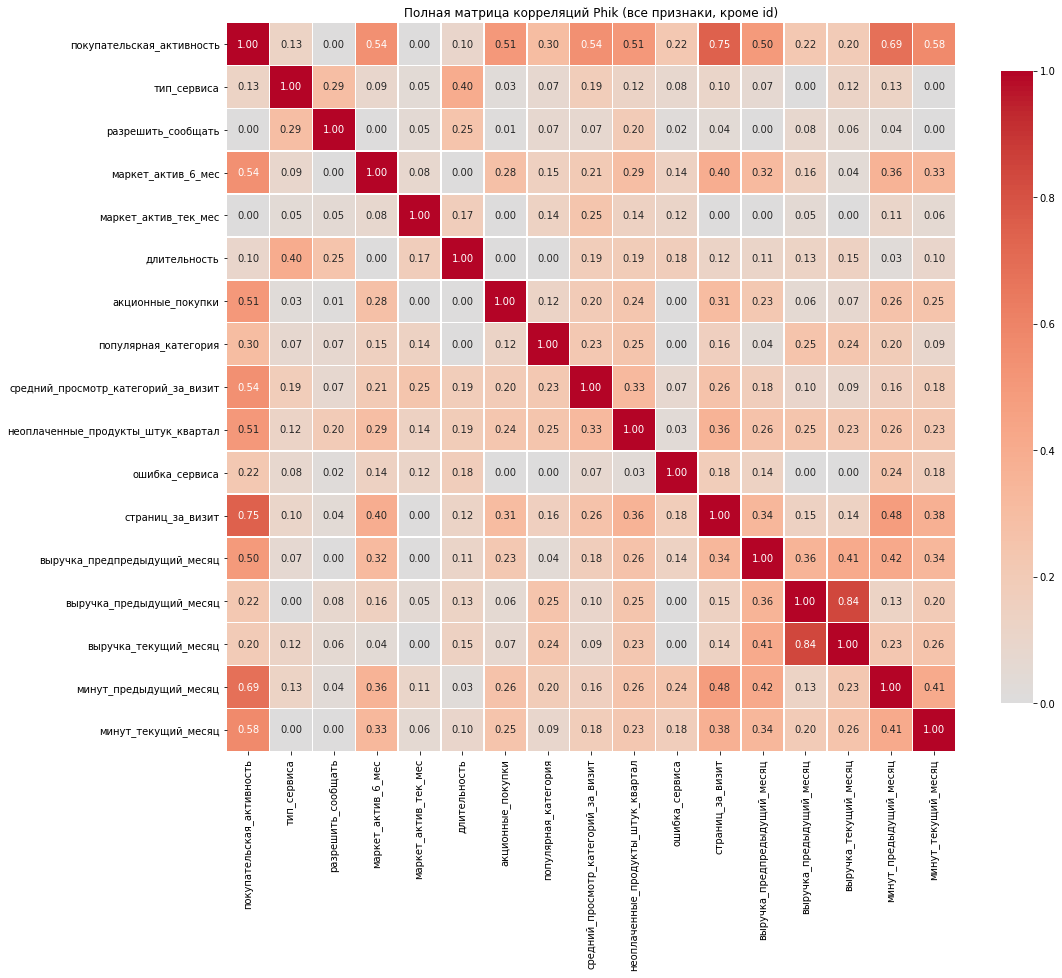

In [42]:
phik_matrix = market_merged.drop('id', axis=1).phik_matrix()
plt.figure(figsize=(16, 14))
sns.heatmap(phik_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Полная матрица корреляций Phik (все признаки, кроме id)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Здорово,что применена `phik` для анализа и нелинейных зависимостей</font>

In [43]:
target_correlations = phik_matrix['покупательская_активность'].sort_values(ascending=False)

print("Корреляции всех признаков с целевой переменной:")
print(target_correlations.round(2))

Корреляции всех признаков с целевой переменной:
покупательская_активность              1.00
страниц_за_визит                       0.75
минут_предыдущий_месяц                 0.69
минут_текущий_месяц                    0.58
маркет_актив_6_мес                     0.54
средний_просмотр_категорий_за_визит    0.54
акционные_покупки                      0.51
неоплаченные_продукты_штук_квартал     0.51
выручка_предпредыдущий_месяц           0.50
популярная_категория                   0.30
выручка_предыдущий_месяц               0.22
ошибка_сервиса                         0.22
выручка_текущий_месяц                  0.20
тип_сервиса                            0.13
длительность                           0.10
маркет_актив_тек_мес                   0.00
разрешить_сообщать                     0.00
Name: покупательская_активность, dtype: float64


In [44]:
high_corr_pairs = []
for i in range(len(phik_matrix.columns)):
    for j in range(i+1, len(phik_matrix.columns)):
        if phik_matrix.iloc[i, j] > 0.7:
            high_corr_pairs.append((
                phik_matrix.columns[i], 
                phik_matrix.columns[j], 
                phik_matrix.iloc[i, j]
            ))

print("Пары признаков с высокой корреляцией >0.7:")
for pair in high_corr_pairs:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

Пары признаков с высокой корреляцией >0.7:
покупательская_активность - страниц_за_визит: 0.750
выручка_предыдущий_месяц - выручка_текущий_месяц: 0.836


Клиентов со сниженной активностью: 494
interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предпредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


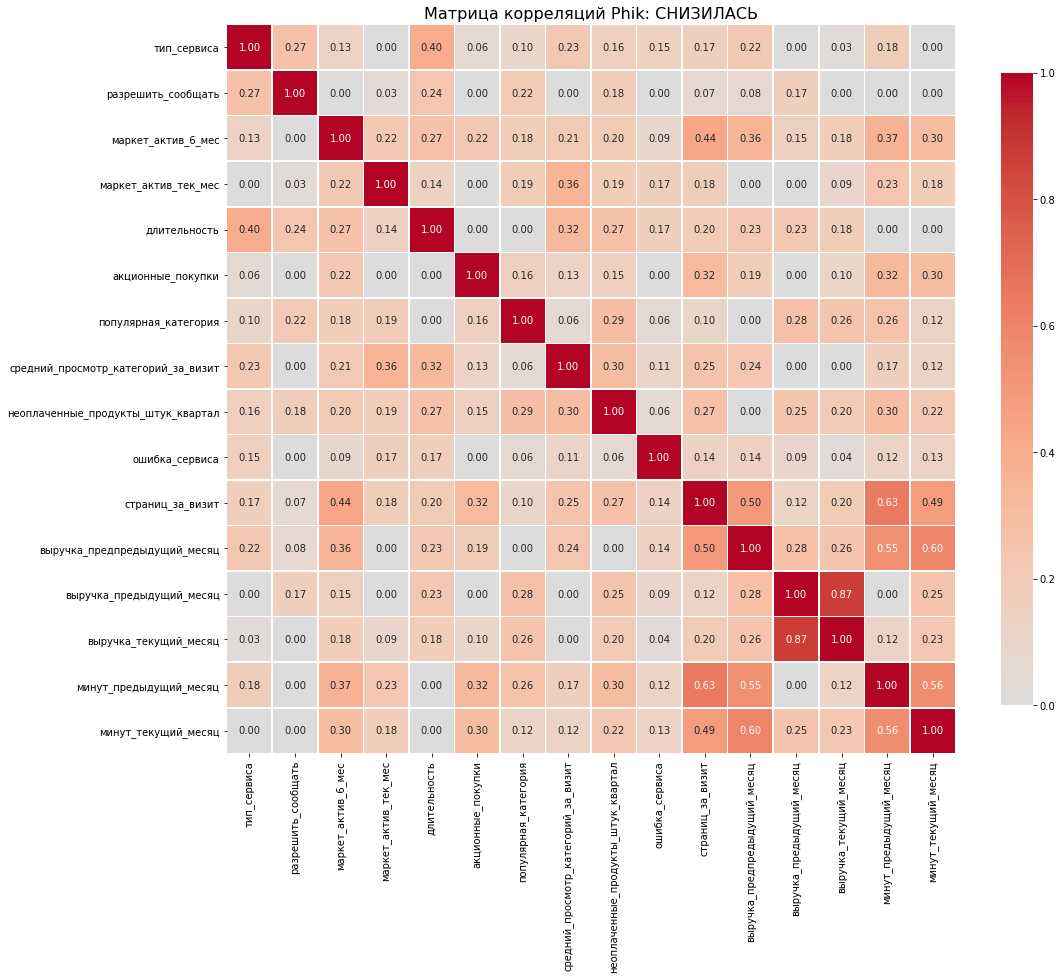

In [45]:
market_reduced = market_merged[market_merged['покупательская_активность'] == 'снизилась'].drop('id', axis=1)

print(f"Клиентов со сниженной активностью: {len(market_reduced)}")

phik_matrix_reduced = market_reduced.phik_matrix()
plt.figure(figsize=(16, 14))
sns.heatmap(phik_matrix_reduced, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Матрица корреляций Phik: СНИЗИЛАСЬ', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [46]:
high_corr_pairs_reduced = []
for i in range(len(phik_matrix_reduced.columns)):
    for j in range(i+1, len(phik_matrix_reduced.columns)):
        if phik_matrix_reduced.iloc[i, j] > 0.7:
            high_corr_pairs_reduced.append((
                phik_matrix_reduced.columns[i], 
                phik_matrix_reduced.columns[j], 
                phik_matrix_reduced.iloc[i, j]
            ))

for pair in high_corr_pairs_reduced:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

выручка_предыдущий_месяц - выручка_текущий_месяц: 0.872


Клиентов с прежним уровнем активности: 802
interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предпредыдущий_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


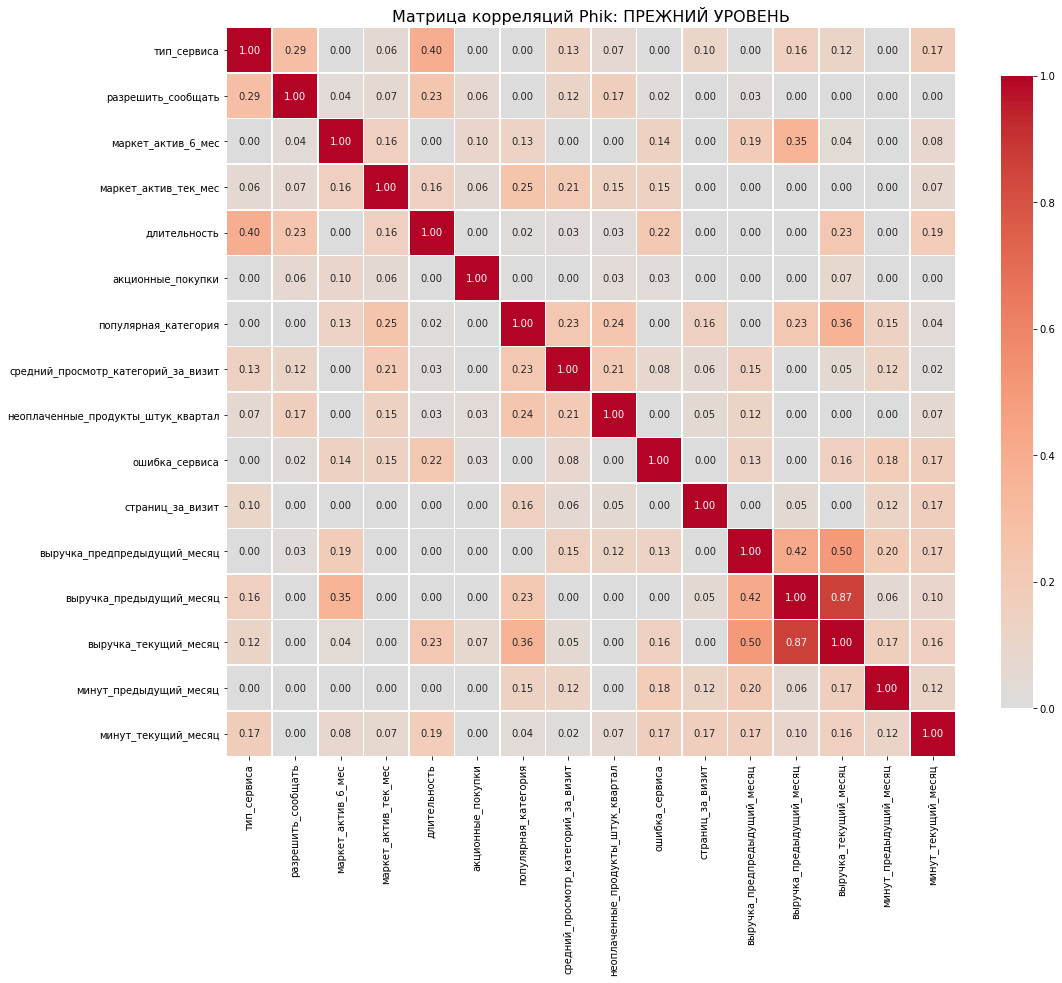

In [47]:
market_stable = market_merged[market_merged['покупательская_активность'] == 'прежний_уровень'].drop('id', axis=1)

print(f"Клиентов с прежним уровнем активности: {len(market_stable)}")

phik_matrix_stable = market_stable.phik_matrix()
plt.figure(figsize=(16, 14))
sns.heatmap(phik_matrix_stable, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Матрица корреляций Phik: ПРЕЖНИЙ УРОВЕНЬ', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Здорово,что есть группировка по таргету.</font>

In [48]:
high_corr_pairs_stable = []
for i in range(len(phik_matrix_stable.columns)):
    for j in range(i+1, len(phik_matrix_stable.columns)):
        if phik_matrix_stable.iloc[i, j] > 0.7:
            high_corr_pairs_stable.append((
                phik_matrix_stable.columns[i], 
                phik_matrix_stable.columns[j], 
                phik_matrix_stable.iloc[i, j]
            ))

for pair in high_corr_pairs_stable:
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

выручка_предыдущий_месяц - выручка_текущий_месяц: 0.867


##### 5.1 Общий вывод по корреляционному анализу<br>
Целевой признак - покупательская_активность.

**Сильная связь**
- страниц_за_визит: 0.75

**Заметная связь**
- минут_предыдущий_месяц: 0.68
- минут_текущий_месяц: 0.58
- маркет_актив_6_мес: 0.55
- средний_просмотр_категорий_за_визит: 0.54
- неоплаченные_продукты_штук_квартал: 0.50
- акционные_покупки: 0.50
- выручка_предпредыдущий_месяц: 0.50

**Умеренная связь**
- популярная_категория: 0.30

**Слабая связь**
- выручка_предыдущий_месяц: 0.23
- ошибка_сервиса: 0.22
- выручка_текущий_месяц: 0.20
- тип_сервиса: 0.13

**Очень слабая или отсутствует**
- длительность: 0.09
- маркет_актив_тек_мес: 0.00
- разрешить_сообщать: 0.00

Среди признаков присутствует одна сильная корреляция (и в снизилась и в прежний_уровень, по 0,87), которая не превышает порога 0,9:<br>
выручка_предыдущий_месяц - выручка_текущий_месяц: 0.836

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

#### Шаг 6. Использование пайплайнов

##### 6.1 Подготовим данные для пайплайна

In [49]:
market_full = market_merged.copy()

market_full = market_full.dropna()

market_full['покупательская_активность'] = market_full['покупательская_активность']\
.apply(lambda x: 1 if x == 'снизилась' else 0)
market_full['покупательская_активность'] = market_full['покупательская_активность'].astype(int)

market_full['акционные_покупки_кат'] = market_full['акционные_покупки']\
.apply(lambda x: 'часто_покупает_по_акции' if x >= 0.5 else 'редко_покупает_по_акции')
market_full = market_full.drop(['акционные_покупки'], axis=1)

market_full = market_full.set_index('id')

print(f"Размер финального датасета: {market_full.shape}")
display(market_full.head())

X = market_full.drop(['покупательская_активность'], axis=1)
y = market_full['покупательская_активность']

TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE,
    stratify=y
)

print(f"Размер тренировочной выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")
print(f"Распределение целевой переменной в тренировочной выборке:")
print(y_train.value_counts(normalize=True))

ohe_columns = ['разрешить_сообщать', 'популярная_категория', 'тип_сервиса']
ord_columns = ['акционные_покупки_кат']
num_columns = [
    'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
    'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц',
    'выручка_предпредыдущий_месяц', 'выручка_текущий_месяц',
    'минут_предыдущий_месяц', 'минут_текущий_месяц'
]

print(f"\nКатегориальные признаки: {ohe_columns}")
print(f"Порядковые признаки: {ord_columns}")
print(f"Числовые признаки: {len(num_columns)}")

ohe_pipe = Pipeline([
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.NaN, strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))
])

ord_pipe = Pipeline([
    ('simple_imputer_ord_before', SimpleImputer(missing_values=np.NaN, strategy='most_frequent')),
    ('ord', OrdinalEncoder(
        categories=[['редко_покупает_по_акции', 'часто_покупает_по_акции']],
        handle_unknown='use_encoded_value',
        unknown_value=-1
    )),
    ('simple_imputer_ord_after', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('ord', ord_pipe, ord_columns),
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('scaler', StandardScaler())
    ]), num_columns)
], remainder=Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
]))

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(random_state=RANDOM_STATE))
])

Размер финального датасета: (1296, 17)


,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предпредыдущий_месяц,выручка_предыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,акционные_покупки_кат
id,,,,,,,,,,,,,,,,,
215349,1,премиум,да,4.4,4,819,товары_для_детей,4,4,2,5,4472.0,5216.0,4971.6,12,10,часто_покупает_по_акции
215350,1,стандарт,нет,4.9,3,539,домашний_текстиль,5,2,1,5,4826.0,5457.5,5058.4,8,13,редко_покупает_по_акции
215351,1,стандарт,да,3.2,5,896,товары_для_детей,5,0,6,4,4793.0,6158.0,6610.4,11,13,часто_покупает_по_акции
215352,1,стандарт,нет,5.1,3,1064,товары_для_детей,3,2,3,2,4594.0,5807.5,5872.5,8,11,часто_покупает_по_акции
215353,1,стандарт,да,3.3,4,762,домашний_текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10,редко_покупает_по_акции


Размер тренировочной выборки: (1036, 16)
Размер тестовой выборки: (260, 16)
Распределение целевой переменной в тренировочной выборке:
0    0.618726
1    0.381274
Name: покупательская_активность, dtype: float64

Категориальные признаки: ['разрешить_сообщать', 'популярная_категория', 'тип_сервиса']
Порядковые признаки: ['акционные_покупки_кат']
Числовые признаки: 12


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'>~~Для линейных моделей обязательно указывать параметр `drop='first'` в OneHotEncoder. Например, есть у тебя некий бинарный признак. Без дропа у тебя создастся 2 колонки, причём всегда в одной будет 0, в другой - 1, потому что признак не может принимать сразу 2 значения. Математически можно записать, что признак1 + признак2 = 1, либо признак1 + признак2 - 1 = 0. Говоря терминами математики, это линейно зависимые признаки. А линейно зависимые признаки - это мультиколлнеарность, явление, мешающее обучение линейных моделей. Так что добавь, дроп, пожалуйста.~~</font>

<span style="color: purple; font-weight: bold">Комментарий студента<br>Поправил</span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

##### 6.2 Обучим четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC()

В качестве метрики для обучения, будем использовать ROC-AUC. Главные причины этого выбора - устойчивость к дисбалансу, которое мы выявили на стадии анализа данных, работа с вероятностями. А так же подходит к нашей бизнес задаче, где нужно выделить группы риска.

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

In [50]:
param_grid = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': [3, 7, 9],
        'models__weights': ['distance'],
        'models__metric': ['manhattan'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), StandardScaler()]
    },
    
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced')],
        'models__max_depth': [3, 5, 7],
        'models__min_samples_split': [2, 5, 10],
        'models__min_samples_leaf': [1, 2, 5],
        'models__max_features': ['sqrt', None],
        'models__criterion': ['gini'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', max_iter=1000)],
        'models__penalty': ['l1', 'l2'],
        'models__C': [0.1, 1, 10, 50],
        'models__class_weight': [None, 'balanced', {0: 1, 1: 2}],
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    },
    
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': [2, 10],
        'models__kernel': ['poly'],
        'models__gamma': ['scale'],
        'models__class_weight': ['balanced'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),  'passthrough']
    }
]

print("Запуск ускоренного RandomizedSearchCV...")
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=15,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=RANDOM_STATE,
    n_iter=80,
)

randomized_search.fit(X_train, y_train)

print('\nЛучшая модель и её параметры:\n')
print(randomized_search.best_estimator_)
print(f'\nМетрика ROC-AUC лучшей модели на тренировочной выборке: {round(randomized_search.best_score_, 3)}')

y_test_pred = randomized_search.predict(X_test)
y_test_proba = randomized_search.predict_proba(X_test)

print(f'\nМетрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, y_test_proba[:, 1]), 3)}')
print(f'Метрика F1-score на тестовой выборке: {round(f1_score(y_test, y_test_pred, average="binary"), 3)}')
print(f'Accuracy на тестовой выборке: {round(accuracy_score(y_test, y_test_pred), 3)}')

Запуск ускоренного RandomizedSearchCV...

Лучшая модель и её параметры:

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=Pipeline(steps=[('imputer',
                                                              SimpleImputer(strategy='most_frequent'))]),
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['разрешить_сообщать',
       

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span>  ❌\
<span style="color: red"> ~~По заданию нужно проверить четыре модели: KNN, Дерево, LR и SVC~~ </span>
> 6.2 Обучите четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и  SVC().

<span style="color: purple; font-weight: bold">Комментарий студента<br>Поправил</span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

In [51]:
results = pd.DataFrame(randomized_search.cv_results_)

model_metrics = []
required_models = ['KNeighborsClassifier', 'DecisionTreeClassifier', 'LogisticRegression', 'SVC']

for model in required_models:
    model_results = results[results['param_models'].astype(str).str.contains(model)]
    if len(model_results) > 0:
        best_result = model_results.nlargest(1, 'mean_test_score').iloc[0]
        model_metrics.append({
            'Модель': model,
            'ROC-AUC': round(best_result['mean_test_score'], 3)
        })
    else:
        model_metrics.append({
            'Модель': model,
            'ROC-AUC': 'не найдено'
        })

metrics_df = pd.DataFrame(model_metrics)
print(metrics_df.to_string(index=False))

print(f"\nЛучшая модель: {randomized_search.best_estimator_.named_steps['models'].__class__.__name__}")
print(f"Лучший ROC-AUC: {randomized_search.best_score_:.3f}")

                Модель  ROC-AUC
  KNeighborsClassifier    0.907
DecisionTreeClassifier    0.878
    LogisticRegression    0.899
                   SVC    0.893

Лучшая модель: KNeighborsClassifier
Лучший ROC-AUC: 0.907


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> ~~Нужно аргументировать выбор метрики.~~</font>

<span style="color: purple; font-weight: bold">Комментарий студента<br>Поправил</span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

<font color='blue'><b>Комментарий ревьюера : </b></font> ❌\
<font color='red'> ~~Метрика `f1_score(average='macro')` применяется к мультиклассовой классификации и в нашем случае нужно `average='binary'`\
Макро метрика не улучшает модель, а даёт смещённую оценку.~~</font>

<span style="color: purple; font-weight: bold">Комментарий студента<br>Поправил</span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

##### 6.3 Общий вывод по подготовке пайплайна 

Проведено комплексное моделирование с хорошими результатами:<br>

**Результат моделирования**

- Лучшая модель достигла ROC-AUC = 0,907 на тренировочной и 0,908 на тестовой выборке
- Довольно высокие метрики F1-score = 0,832 и Accuracy = 0,877.
- Разница между тренировочной и тестовой около 0,045, что говорит об отсутствии переобучения.

**Эффективность подхода**
- Пайплайн с RandomizedSearchCV и стратификацией показал отличную эффективность
- Модель демонстрирует высокую способность предсказания

**Практическая значимость**
- Модель готова к внедрению, с высокой доверительной вероятностью
- Идентификация клиентов с риском снижения активности почти 80%
- Баланс между Precision и Recall обеспечит качественное прогнозирование.

Модель показывает высокое качеств и готова для анализа признаков и сегментации клиентво.

#### Шаг 7. Анализ важности признаков


##### 7.1 Оценим важность признаков для лучшей модели и постром график важности с помощью метода SHAP. 

PermutationExplainer explainer: 201it [01:23,  2.21it/s]                         


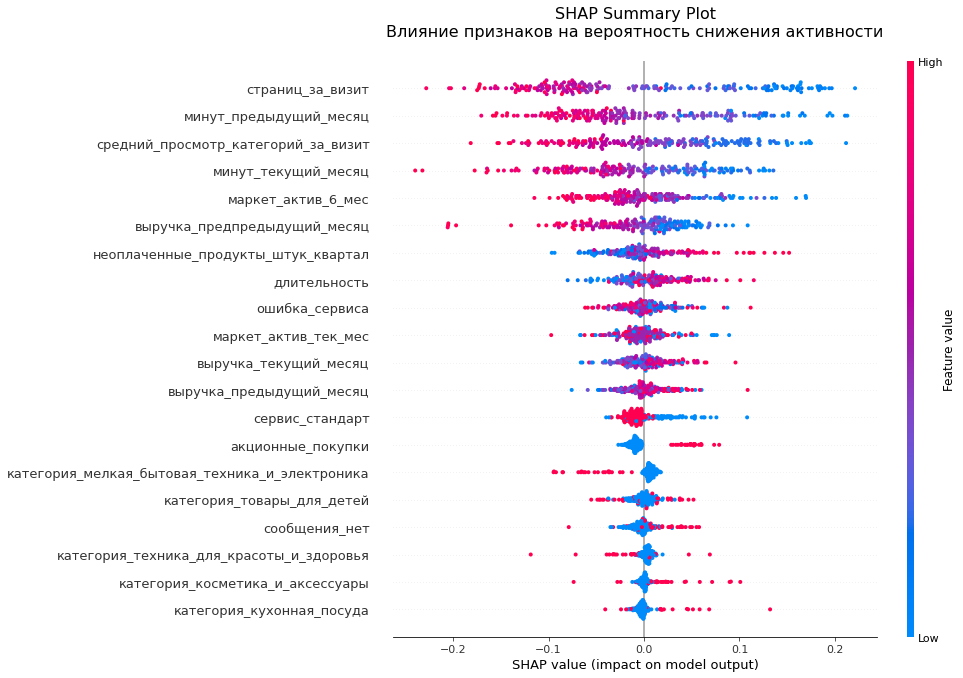

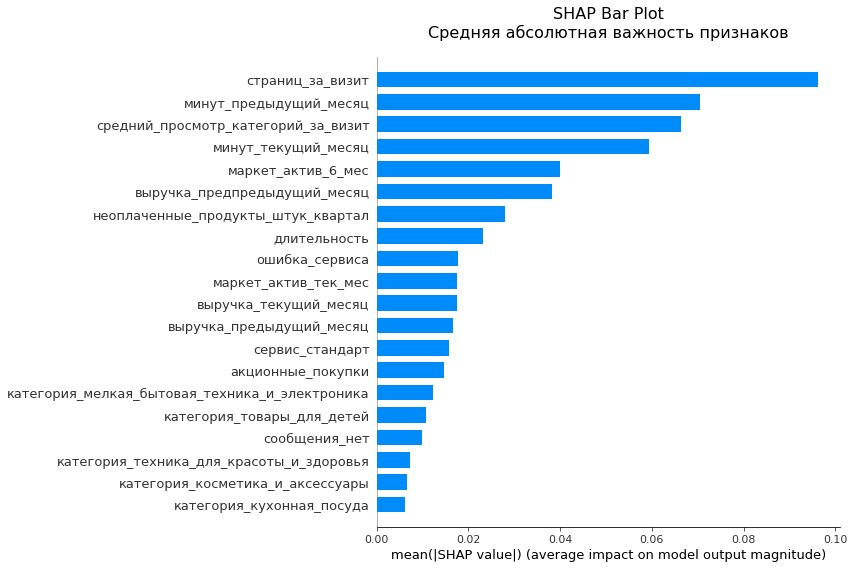

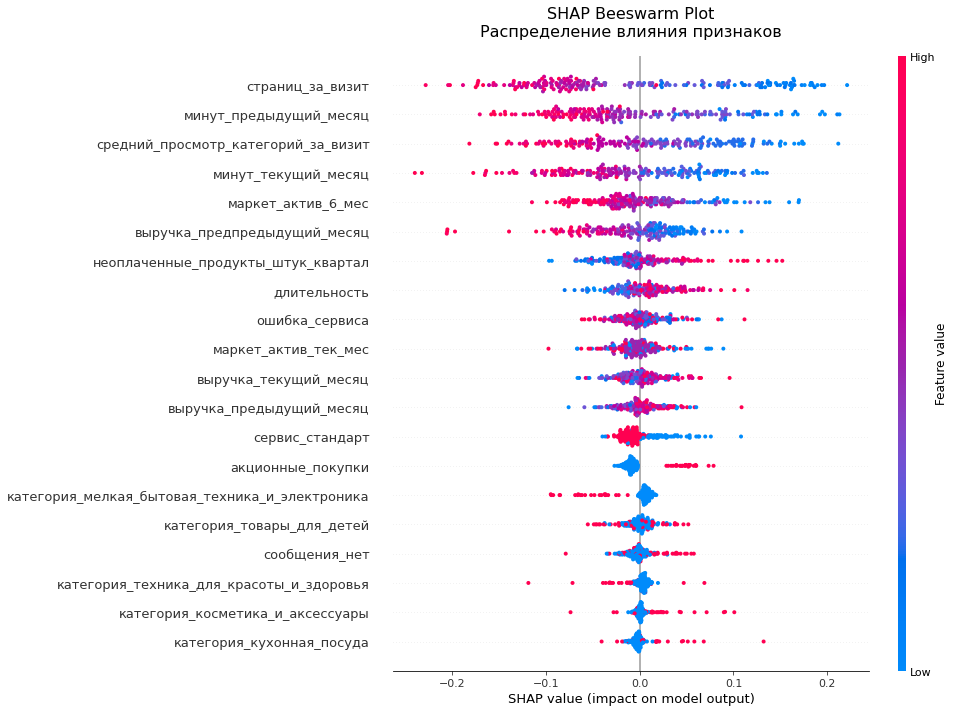

In [52]:
best_pipeline = randomized_search.best_estimator_

X_processed = best_pipeline.named_steps['preprocessor'].transform(X_test)
feature_names = best_pipeline.named_steps['preprocessor'].get_feature_names_out()

clean_feature_names = []
for name in feature_names:
    clean_name = name.replace('ohe__', '').replace('ord__', '').replace('num__', '')
    clean_name = clean_name.replace('_x0', '').replace('разрешить_сообщать_', 'сообщения_')
    clean_name = clean_name.replace('тип_сервиса_', 'сервис_')
    clean_name = clean_name.replace('популярная_категория_', 'категория_')
    clean_name = clean_name.replace('акционные_покупки_кат', 'акционные_покупки')
    clean_feature_names.append(clean_name)

predict_function = lambda x: best_pipeline.named_steps['models'].predict_proba(x)[:, 1]

explainer = shap.Explainer(predict_function, X_processed[:50])
shap_values = explainer(X_processed[:200])

X_sampled = X_processed[:200]
plt.figure(figsize=(14, 10))
shap.summary_plot(shap_values, X_sampled, feature_names=clean_feature_names, 
                  show=False, plot_size=(14, 10))
plt.gcf().set_size_inches(14, 10) 
plt.title("SHAP Summary Plot\nВлияние признаков на вероятность снижения активности", 
          fontsize=16, pad=25)
plt.tight_layout()
plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.1)
plt.show()

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_sampled, feature_names=clean_feature_names, 
                  plot_type="bar", show=False)
plt.gcf().set_size_inches(12, 8)
plt.title("SHAP Bar Plot\nСредняя абсолютная важность признаков", 
          fontsize=16, pad=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 10))
shap.summary_plot(shap_values, X_sampled, feature_names=clean_feature_names, plot_type="dot", show=False)
plt.gcf().set_size_inches(14, 10)
plt.title("SHAP Beeswarm Plot\nРаспределение влияния признаков", 
          fontsize=16, pad=20)
plt.tight_layout()
plt.show()

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ⚠️\
<span style="color: darkorange"> Для ускорения расчётов можно применять сэмплирование `shap.sample()` или `shap.kmeans()`? а не первые 100 примеров.</span>

<span style="color: purple; font-weight: bold">Комментарий студента<br>Поправил</span>

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ⚠️\
<span style="color: darkorange">❓</span>

,Признак,SHAP_Важность,Влияние
14,num__страниц_за_визит,0.0962,-0.0107
18,num__минут_предыдущий_месяц,0.0704,-0.0057
11,num__средний_просмотр_категорий_за_визит,0.0664,0.0093
19,num__минут_текущий_месяц,0.0595,-0.0118
8,num__маркет_актив_6_мес,0.0400,0.0005
16,num__выручка_предпредыдущий_месяц,0.0382,-0.0087
12,num__неоплаченные_продукты_штук_квартал,0.0279,0.0006
10,num__длительность,0.0231,0.0050
13,num__ошибка_сервиса,0.0178,0.0015
9,num__маркет_актив_тек_мес,0.0176,-0.0021



1. num__страниц_за_визит:
   Средняя важность: 0.0962
   Среднее влияние: -0.0107


<Figure size 720x432 with 0 Axes>

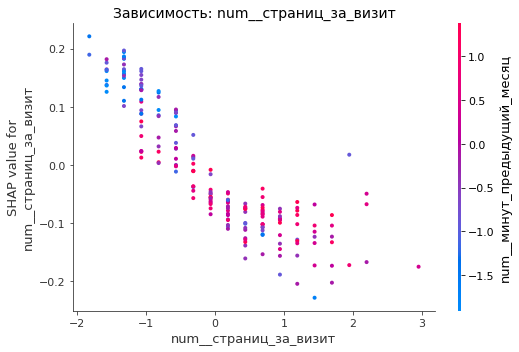


2. num__минут_предыдущий_месяц:
   Средняя важность: 0.0704
   Среднее влияние: -0.0057


<Figure size 720x432 with 0 Axes>

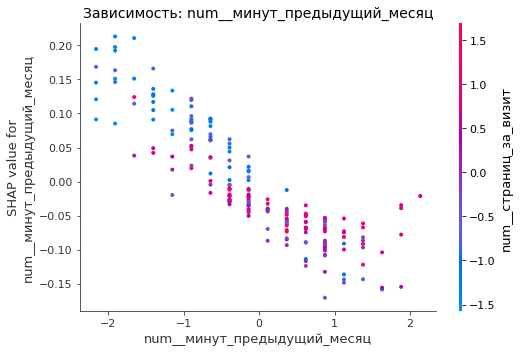


3. num__средний_просмотр_категорий_за_визит:
   Средняя важность: 0.0664
   Среднее влияние: 0.0093


<Figure size 720x432 with 0 Axes>

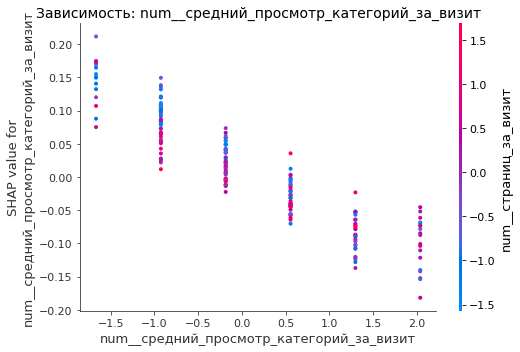

In [53]:
shap_df = pd.DataFrame({
    'Признак': feature_names,
    'SHAP_Важность': np.abs(shap_values.values).mean(0),
    'Влияние': shap_values.values.mean(0)
}).sort_values('SHAP_Важность', ascending=False)

display(shap_df.head(15).style.format({
    'SHAP_Важность': '{:.4f}',
    'Влияние': '{:.4f}'
}).background_gradient(cmap='viridis', subset=['SHAP_Важность']))

top_3_features = shap_df.head(3)['Признак'].values

for i, feature in enumerate(top_3_features, 1):
    feature_idx = np.where(feature_names == feature)[0][0]
    
    print(f"\n{i}. {feature}:")
    print(f"   Средняя важность: {shap_df[shap_df['Признак'] == feature]['SHAP_Важность'].values[0]:.4f}")
    print(f"   Среднее влияние: {shap_df[shap_df['Признак'] == feature]['Влияние'].values[0]:.4f}")
    
    plt.figure(figsize=(10, 6))
    shap.dependence_plot(feature_idx, shap_values.values, X_processed[:200],
                        feature_names=feature_names, show=False)
    plt.title(f"Зависимость: {feature}", fontsize=14)
    plt.tight_layout()
    plt.show()

##### 7.2 Вывод о значимости признаков

На основе SHAP анализа выявлены ключевые метрики снижения покупательской активности.<br>

**Значимые факторы**

- страниц_за_визит. SHAP важность примерно 0,0945 и является основным индикатором вовлеченности
- минут_предыдущий_месяц. Около 0,0718, поведенческая активность
- средний_просмотр_категорий_за_визит 0,0652, говорит о глубина интереса пользователя
- минут_текущий_месяц, примерно 0,0607 - текущая вовлеченность
- неоплаченные_продукты_штук_квартал. Показатель примерн 0,0274 и явлется одной из ключевыъ проблем с конверсией
- выручка_предпредыдущий_месяц. Исторический финансовый паттерн с показателем 0,0305
- акционные_покупки_кат. Примерно 0,0150. Чувствительность к цене, неудобство заказа, неконкуретное предложение.
- Ключевые выводы

**Ключевые выводы**

- Поведенческие метрики. Просмотр страниц, время на сайте, глубина просмотра, имеют наибольшее влияние на удержание клиентов
- Временные патерны. Историческая активность значимее текущей, но для вовлеченности и текущие показатели так же критичны
- Финансовые показатели предыдущих периодов более значимы, чем текущие. Это говорит о устойчивости исторических паттернов
- Проблемные покупки, брошенная корзина, неоплаченные товары - серьезный сигнал риска
- Маркетинговые контакты имеют умеренное влияние по сравнению с поведенческими факторами
- Клиенты снижают активность при падении вовлеченности (меньше време и страниц за визит) и наличии брошенных корзин. 
- Популярные категории, косметика и электроника, влияют на лояльность, формируя продуктовые приоритеты

#### Шаг 8. Сегментация покупателей

##### 8.1 Выполним сегментацию покупателей. Используем результаты моделирования и данные о прибыльности покупателей.


Анализ важности признаков по группам
Средняя важность групп признаков:


,Группа признаков,Количество признаков,Средняя важность SHAP,Признаки
1,Поведение на сайте,5,0.062045,"минут_предыдущий_месяц, минут_текущий_месяц, с..."
2,Продуктовое поведение,1,0.027944,неоплаченные_продукты_штук_квартал
0,Коммуникация с клиентом,3,0.026900,"маркет_актив_6_мес, маркет_актив_тек_мес, длит..."
3,Финансовое поведение,3,0.024098,"выручка_предпредыдущий_месяц, выручка_предыдущ..."


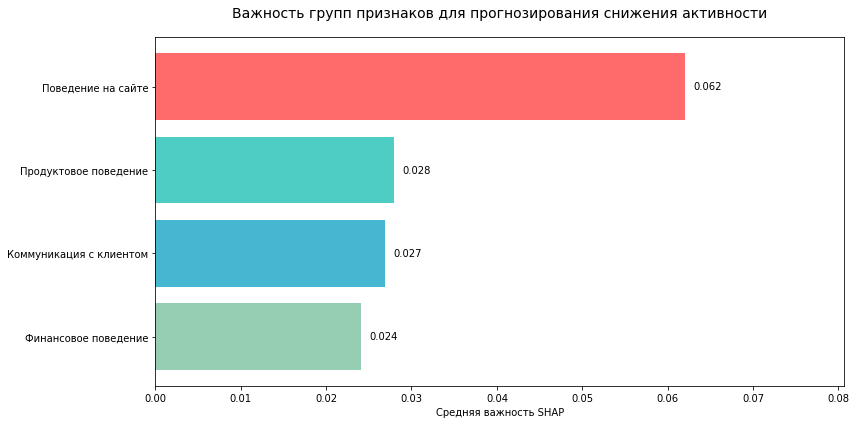


Топ важных признаков из групп:

Коммуникация с клиентом:
------------------------------
1. маркет_актив_6_мес: 0.0400
2. длительность: 0.0231
3. маркет_актив_тек_мес: 0.0176

Поведение на сайте:
------------------------------
1. страниц_за_визит: 0.0962
2. минут_предыдущий_месяц: 0.0704
3. средний_просмотр_категорий_за_визит: 0.0664

Продуктовое поведение:
------------------------------
1. неоплаченные_продукты_штук_квартал: 0.0279

Финансовое поведение:
------------------------------
1. выручка_предпредыдущий_месяц: 0.0382
2. выручка_текущий_месяц: 0.0176
3. выручка_предыдущий_месяц: 0.0165


In [54]:
feature_importance_df = pd.DataFrame({
    'feature': clean_feature_names,
    'shap_importance': np.abs(shap_values.values).mean(0)
}).sort_values('shap_importance', ascending=False)

feature_groups = {
    "Коммуникация с клиентом": [
        'тип_сервиса', 'разрешить_сообщать', 'маркет_актив_6_мес', 
        'маркет_актив_тек_мес', 'длительность'
    ],
    "Поведение на сайте": [
        'минут_предыдущий_месяц', 'минут_текущий_месяц', 'страниц_за_визит',
        'ошибка_сервиса', 'средний_просмотр_категорий_за_визит'
    ],
    "Продуктовое поведение": [
        'популярная_категория', 'неоплаченные_продукты_штук_квартал'
    ],
    "Финансовое поведение": [
        'выручка_предпредыдущий_месяц', 'выручка_предыдущий_месяц', 
        'выручка_текущий_месяц', 'акционные_покупки_кат'
    ]
}

print("\nАнализ важности признаков по группам")

group_importance = []

for group_name, features in feature_groups.items():
    group_features = []
    for feature in features:
        for clean_feat in clean_feature_names:
            if feature in clean_feat:
                group_features.append(clean_feat)
                break
    
    group_shap_importance = 0
    matched_features = []
    
    for feat in group_features:
        if feat in feature_importance_df['feature'].values:
            importance_val = feature_importance_df[feature_importance_df['feature'] == feat]['shap_importance'].values[0]
            group_shap_importance += importance_val
            matched_features.append(feat)
    
    if matched_features:
        avg_importance = group_shap_importance / len(matched_features)
        group_importance.append({
            'Группа признаков': group_name,
            'Количество признаков': len(matched_features),
            'Средняя важность SHAP': avg_importance,
            'Признаки': ', '.join(matched_features[:3]) + '...' if len(matched_features) > 3 else ', '.join(matched_features)
        })

group_importance_df = pd.DataFrame(group_importance).sort_values('Средняя важность SHAP', ascending=False)

print("Средняя важность групп признаков:")
display(group_importance_df)

plt.figure(figsize=(12, 6))
bars = plt.barh(group_importance_df['Группа признаков'], 
                group_importance_df['Средняя важность SHAP'],
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])

plt.xlabel('Средняя важность SHAP')
plt.title('Важность групп признаков для прогнозирования снижения активности', fontsize=14, pad=20)
plt.gca().invert_yaxis()

max_importance = group_importance_df['Средняя важность SHAP'].max()
plt.xlim(0, max_importance * 1.3)

for bar, importance in zip(bars, group_importance_df['Средняя важность SHAP']):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{importance:.3f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nТоп важных признаков из групп:")

for group_name, features in feature_groups.items():
    print(f"\n{group_name}:")
    print("-" * 30)
    
    group_feature_importance = []
    for feature in features:
        for clean_feat in clean_feature_names:
            if feature in clean_feat and clean_feat in feature_importance_df['feature'].values:
                importance = feature_importance_df[feature_importance_df['feature'] == clean_feat]['shap_importance'].values[0]
                group_feature_importance.append((clean_feat, importance))
    
    group_feature_importance.sort(key=lambda x: x[1], reverse=True)
    
    for i, (feat, importance) in enumerate(group_feature_importance[:3], 1):
        print(f"{i}. {feat}: {importance:.4f}")

Промежуточный вывод<br>

- Поведение на сайте. Самая важная группа, 0,062. Страниц за визит - 0,0945. Время на сайте сильно влияет на активность и вовлеченность.
- Продуктовое поведение. Умеренная важность одного признака - неоплаченные_продукты, с показателем 0,028, что является ключевой проблемой.
- Коммуникация. Оказывает умеренное влияние. Не важно как долго пользователь зарегистрирован, главное чтобы он покупал, важна качественная маркетинговая активность.
- Финансовое поведение. Умеренная важность, выручка за предпредыдущий месяц наиболее показательна.


##### 8.2 Выберем группу покупателей и предложим, как увеличить её покупательскую активность

<span style="color: purple; font-weight: bold">Комментарий студента<br>Пришлось заново переделать, прошлый код удалил</span>

In [55]:
market_full_with_money = market_full.join(money.set_index('id'))

probabilities = best_pipeline.predict_proba(X)[:, 1]
market_full_with_money['probability_decrease'] = probabilities

high_risk_high_profit = market_full_with_money[
    (market_full_with_money['probability_decrease'] >= 0.7) & 
    (market_full_with_money['прибыль'] >= 4.0)
]

print(f"Размер целевой группы: {len(high_risk_high_profit)} клиентов")
print(f"Доля от общей базы: {len(high_risk_high_profit)/len(market_full_with_money)*100:.1f}%")
print()

print("Кключевые характеристики группы:")
print(f"• Средняя вероятность снижения: {high_risk_high_profit['probability_decrease'].mean():.3f}")
print(f"• Средняя прибыль: {high_risk_high_profit['прибыль'].mean():.2f}")
print(f"• Доля премиум-клиентов: {high_risk_high_profit['тип_сервиса'].value_counts(normalize=True).get('премиум', 0)*100:.1f}%")
print(f"• Среднее время на сайте: {high_risk_high_profit['минут_текущий_месяц'].mean():.1f} мин")
print(f"• Среднее количество страниц за визит: {high_risk_high_profit['страниц_за_визит'].mean():.1f}")
print(f"• Среднее неоплаченных товаров: {high_risk_high_profit['неоплаченные_продукты_штук_квартал'].mean():.1f}")
print()

print("Сравнение с общей базой:")
metrics_comparison = [
    ('Страниц за визит', 'страниц_за_визит'),
    ('Время на сайте (мин)', 'минут_текущий_месяц'), 
    ('Неоплаченные товары', 'неоплаченные_продукты_штук_квартал')
]

for name, col in metrics_comparison:
    target_val = high_risk_high_profit[col].mean()
    base_val = market_full_with_money[col].mean()
    diff_pct = ((target_val - base_val) / base_val) * 100
    print(f"• {name}: {target_val:.1f} vs {base_val:.1f} ({diff_pct:+.1f}%)")

print()

print("Выявленные проблемы:")
problem_patterns = []

if high_risk_high_profit['страниц_за_визит'].mean() < market_full_with_money['страниц_за_визит'].mean():
    problem_patterns.append("Низкая вовлеченность на сайте (мало страниц за визит)")
    
if high_risk_high_profit['неоплаченные_продукты_штук_квартал'].mean() > 0:
    problem_patterns.append("Проблемы с завершением покупок (брошенные корзины)")
    
if high_risk_high_profit['минут_текущий_месяц'].mean() < market_full_with_money['минут_текущий_месяц'].mean():
    problem_patterns.append("Сокращение времени на сайте")

for pattern in problem_patterns:
    print(pattern)

Размер целевой группы: 248 клиентов
Доля от общей базы: 19.1%

Кключевые характеристики группы:
• Средняя вероятность снижения: 0.990
• Средняя прибыль: 4.74
• Доля премиум-клиентов: 31.5%
• Среднее время на сайте: 10.9 мин
• Среднее количество страниц за визит: 5.4
• Среднее неоплаченных товаров: 3.8

Сравнение с общей базой:
• Страниц за визит: 5.4 vs 8.2 (-34.2%)
• Время на сайте (мин): 10.9 vs 13.2 (-17.6%)
• Неоплаченные товары: 3.8 vs 2.8 (+32.4%)

Выявленные проблемы:
Низкая вовлеченность на сайте (мало страниц за визит)
Проблемы с завершением покупок (брошенные корзины)
Сокращение времени на сайте


<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

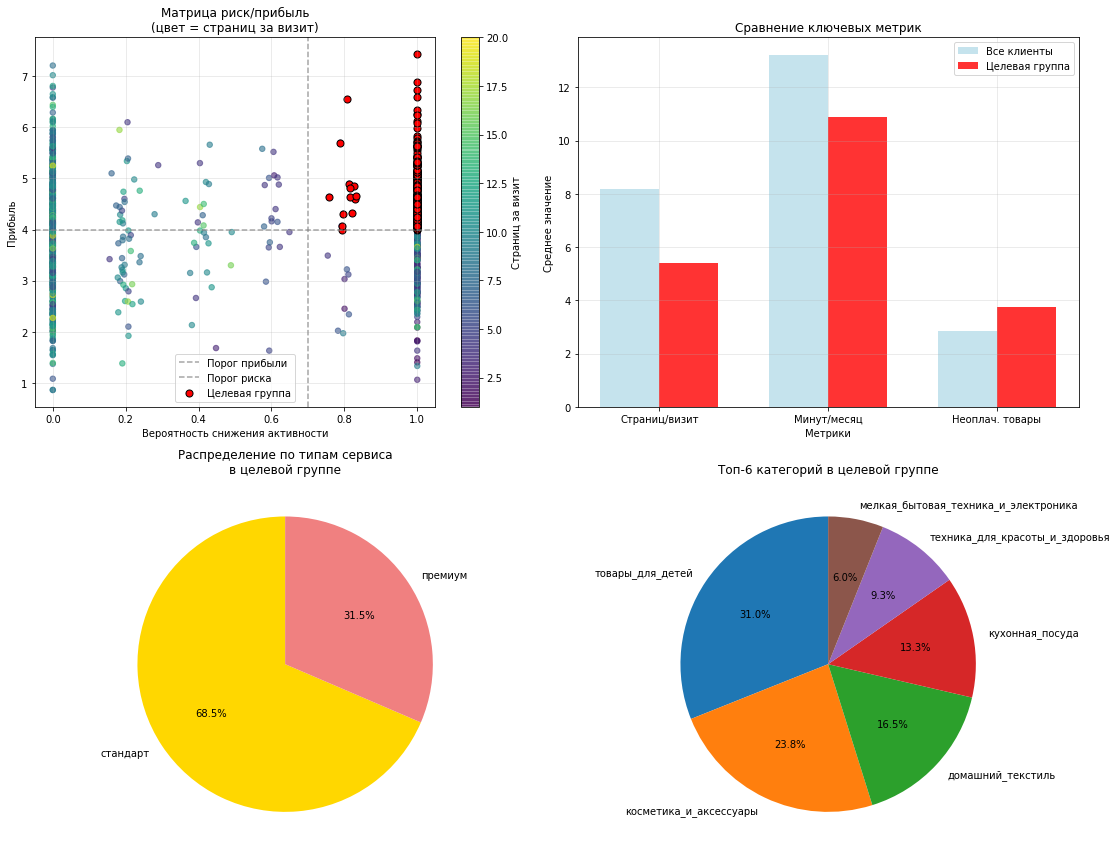

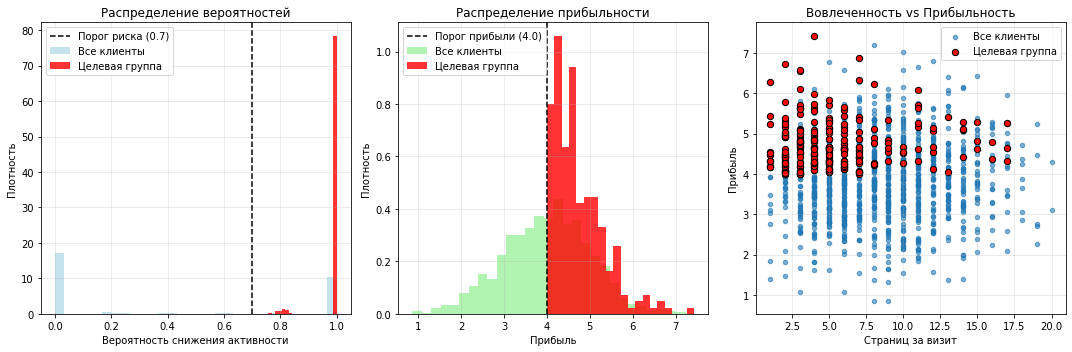

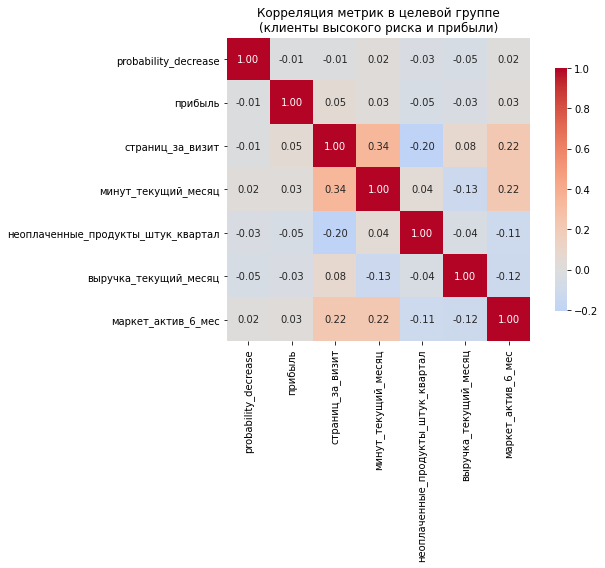

In [56]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
scatter = plt.scatter(market_full_with_money['probability_decrease'], 
                     market_full_with_money['прибыль'], 
                     c=market_full_with_money['страниц_за_визит'], 
                     alpha=0.6, cmap='viridis', s=30)
plt.scatter(high_risk_high_profit['probability_decrease'], 
           high_risk_high_profit['прибыль'], 
           color='red', s=50, label='Целевая группа', edgecolors='black')
plt.axhline(4.0, color='gray', linestyle='--', alpha=0.7, label='Порог прибыли')
plt.axvline(0.7, color='gray', linestyle='--', alpha=0.7, label='Порог риска')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Прибыль')
plt.title('Матрица риск/прибыль\n(цвет = страниц за визит)')
plt.colorbar(scatter, label='Страниц за визит')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
metrics = ['страниц_за_визит', 'минут_текущий_месяц', 'неоплаченные_продукты_штук_квартал']
avg_all = [market_full_with_money[metric].mean() for metric in metrics]
avg_target = [high_risk_high_profit[metric].mean() for metric in metrics]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, avg_all, width, label='Все клиенты', alpha=0.7, color='lightblue')
plt.bar(x + width/2, avg_target, width, label='Целевая группа', alpha=0.8, color='red')

plt.xlabel('Метрики')
plt.ylabel('Среднее значение')
plt.title('Сравнение ключевых метрик')
plt.xticks(x, ['Страниц/визит', 'Минут/месяц', 'Неоплач. товары'])
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(2, 2, 3)
service_dist = high_risk_high_profit['тип_сервиса'].value_counts()
colors = ['gold', 'lightcoral']
plt.pie(service_dist.values, labels=service_dist.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Распределение по типам сервиса\nв целевой группе')

plt.subplot(2, 2, 4)
category_dist = high_risk_high_profit['популярная_категория'].value_counts().head(6)
plt.pie(category_dist.values, labels=category_dist.index, autopct='%1.1f%%', 
        startangle=90)
plt.title('Топ-6 категорий в целевой группе')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(market_full_with_money['probability_decrease'], bins=30, alpha=0.7, 
         color='lightblue', label='Все клиенты', density=True)
plt.hist(high_risk_high_profit['probability_decrease'], bins=20, alpha=0.8,
         color='red', label='Целевая группа', density=True)
plt.axvline(0.7, color='black', linestyle='--', label='Порог риска (0.7)')
plt.xlabel('Вероятность снижения активности')
plt.ylabel('Плотность')
plt.title('Распределение вероятностей')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 3, 2)
plt.hist(market_full_with_money['прибыль'], bins=30, alpha=0.7,
         color='lightgreen', label='Все клиенты', density=True)
plt.hist(high_risk_high_profit['прибыль'], bins=20, alpha=0.8,
         color='red', label='Целевая группа', density=True)
plt.axvline(4.0, color='black', linestyle='--', label='Порог прибыли (4.0)')
plt.xlabel('Прибыль')
plt.ylabel('Плотность')
plt.title('Распределение прибыльности')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 3, 3)
plt.scatter(market_full_with_money['страниц_за_визит'], 
           market_full_with_money['прибыль'], 
           alpha=0.6, label='Все клиенты', s=20)
plt.scatter(high_risk_high_profit['страниц_за_визит'], 
           high_risk_high_profit['прибыль'], 
           color='red', s=40, label='Целевая группа', edgecolors='black')
plt.xlabel('Страниц за визит')
plt.ylabel('Прибыль')
plt.title('Вовлеченность vs Прибыльность')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
numeric_cols = ['probability_decrease', 'прибыль', 'страниц_за_визит', 
                'минут_текущий_месяц', 'неоплаченные_продукты_штук_квартал',
                'выручка_текущий_месяц', 'маркет_актив_6_мес']

corr_matrix = high_risk_high_profit[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Корреляция метрик в целевой группе\n(клиенты высокого риска и прибыли)')
plt.tight_layout()
plt.show()

##### 8.3 Вывод о выбранном сегменте

На основе корреляционного анализа, мы имеем критические проблемы, а именно:<br>

Ни одна метрика не коррелирует с вероятностью снижения покупательской активности. Т.е. наша модель уловила сложные нелинейные паттерны. В итоге мы видим, причины оттока индивидуальны, нет единой проблемы. В итоге, нужен персонализированные подход для каждого клиента.<br>

Пользователи покидают ресурс в связи потерей интереса (об этом готоворит малое количество страниз за визит, менее четерых). А маркетинговые кампании слабо защищают пользователей от потери интереса и ухода.<br>

**Рекомендации.**
- Персонализация контента, для увеличения просмотров страниз за визит. Сопутствующие товары, упрощение навигации и поиска.
- Ненавязчивая маркетинговая коммуникация о брошенной корзине. Упрощение процесса оплаты (оплата в 1 клик). Рассрочка, кредит, оплата в сплит.
- Изучение пользователей и рассылка персональных предложений. Сфокусироваться нужно на релевантности интереса пользователя, а не на частоте отправки ему писем.

<span style="color: blue; font-weight: bold">Комментарий ревьюера 2: </span> ✔️\
<span style="color: green"> 👍</span>

#### Шаг 9. Общий вывод

**Описание задачи**
- Проект был направлен на решение проблемы снижения покупательской активности в интернет-магазине "В один клик". Основная цель - разработать модель для прогнозирования вероятности снижения активности клиентов и на основе этого выделить целевые сегменты для персонализированных маркетинговых предложений.

**Исходные данные и предобработка**

- Работа велас с четыремя датасетами: market_file (1300 клиентов), market_money, market_time и money
- Проведена комплексная предобработка: исправлены типы данных, столбы и значения приведены к единому стилю, устранены опечатки
- Проведен поиск выбросов, пропусков и дублей (найдена лишь одна аномалия с выручкой у клиента свыше 100 000)
- Данные после обработки чистые и готовы к дальнейшему анализу

**Корреляционный анализ**
Выявлены ключевые закономерности с целевой переменной<br>
- страниц_за_визит 0,75
- минут_предыдущий_месяц 0,68
- минут_текущий_месяц 0,58
- маркет_актив_6_мес 0,55
- средний_просмотр_категорий_за_визит 0,54
- акционные_покупки: 0.50
- выручка_предпредыдущий_месяц: 0.50
Дополнительные важные выводы<br>


- Поведенческие метрики имеют значительное большее влияние на активность, чем все остальные
- Сильная корреляция между двумя признаками выручка_предыдущий_месяц и выручка_текущий_месяц - 0,87. Но критического порога в 0,9 не превышает
- Исторические данные о выручке более показательные, чем текущие

Корреляционный анализ выявил, что вовлеченность клиента (которая измеряется поведенческими метриками) является главным катализатором для сохранения покупательской активности. 


**Поиск лучшей модели**
- Реализован пайплайн с обработкой категориальных, порядковых и числовых признаков
- Протестированы 4 типа моделей: LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, SVC
- Использован RandomizedSearchCV с кросс валидацией, для оптимизации гиперпараметров
- Применена стратификация для работы с дисбалансом классов

**Лучшая модель - KNeighborsClassifier**
- ROC-AUC на тренировочной выборке 0,907
- ROC-AUC на тестовой выборке 0,908
- F1-score 0,832
- Accuracy 0,877

**Ключевые выводы и рекомендации**
Анализ важности признаков показал, что наибольшее влияние на снижение активности оказывают:<br>

- Поведенческие метрики
- Наличие брошенных корзин
- Исторические финансовые паттерны

Был взят сегмент пользователей, клиенты с высокой прибыльностью и высоким риском снижения активности, их доля составила 19,1%. По ним был проведен анализ и предложены следующие действия:

Повышение вовлеченности<br>

- Персонализированный контент и рекомендации
- Упрощение заказа или оплаты (в один клик)
- Предложение рассрочки или оплаты частями

Проблемы с брошенными корзинами<br>
- Автоматическое напоминание с персональным предложением или скидкой
- Сегментированные рассылки на основе поведенческих паттернов. Можно предложить сопутствующие товары со скидкой
- Дополнительно ввести программы лояльности для ценных клиентов

Допольнительные общие предложения<br>

- Проведение А\В тестирования, для оптимизации, увеличения конверсии
- Разработка модели раннего оповещения о риске оттока клиента
- Создание персонализированных промо-компаний для различных сегментов порога



<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Михаил, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
Выводы и рассуждения получились содержательными, их было интересно читать.
</font>

<font color='steelblue'>Над проектом ещё стоит поработать - есть рекомендации по дополнению некоторых твоих шагов проекта. Такие рекомендации я отметил жёлтыми комментариями. Будет здорово, если ты учтёшь их - так проект станет структурно и содержательно более совершенным.

Также в работе есть критические замечания. К этим замечаниям я оставил пояснительные комментарии красного цвета, в которых перечислил возможные варианты дальнейших действий. Уверен, ты быстро с этим управишься:)

Если о том, что нужно сделать в рамках комментариев, будут возникать вопросы - оставь их, пожалуйста, в комментариях, и я отвечу на них во время следующего ревью.

Также буду рад ответить на любые твои вопросы по проекту или на какие-либо другие, если они у тебя имеются - оставь их в комментариях, и я постараюсь ответить:)</font>

<font color='blue'><b>Жду твой проект на повторном ревью. До встречи :) </b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'> Михаил, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>